# Analysis of data for the paper: XXX 
## Submitted to ICSOC 2024


### General variables, parameters, module imports, and functions required for the loading of the pricing models specified using Yaml4SaaS

In [1]:
from dataset_generator import PricingsLoader
from matplotlib import pyplot as plt
from models import PricingManager
from IPython.display import display, Markdown
import numpy as np
import pandas as pd

STUDIED_YEARS = ["2019", "2020", "2021", "2022", "2023", "2024"]

In [2]:
def get_data_from_dataset(dataset):
    data = {}
    max_plans = 0
    max_features = 0
    max_add_ons = 0

    for i in range(len(dataset)):
        pricing: PricingManager = dataset[i]
        saas_index_name = pricing.saas_name.split(" ")[0].strip().lower().capitalize()
        if saas_index_name.lower() == "office":
            continue
        if saas_index_name not in data:
            data[saas_index_name] = {year: None for year in STUDIED_YEARS}
        
        data[saas_index_name][str(pricing.year)] = {}
        data[saas_index_name][str(pricing.year)]["number_of_features"] = len(pricing.features)
        data[saas_index_name][str(pricing.year)]["number_of_plans"] = len(pricing.plans)
        data[saas_index_name][str(pricing.year)]["number_of_addons"] = len(pricing.add_ons)
        data[saas_index_name][str(pricing.year)]["has_many_products"] = len(pricing.saas_name.strip().split(" ")) > 1

        if len(pricing.features) > max_features:
            max_features = len(pricing.features)
        
        if len(pricing.plans) > max_plans:
            max_plans = len(pricing.plans)
        
        if len(pricing.add_ons) > max_add_ons:
            max_add_ons = len(pricing.add_ons)

    data_items = sorted(data.items(), key=lambda x: x[0], reverse=True)
    data = dict(data_items)

    return data, max_plans, max_features, max_add_ons

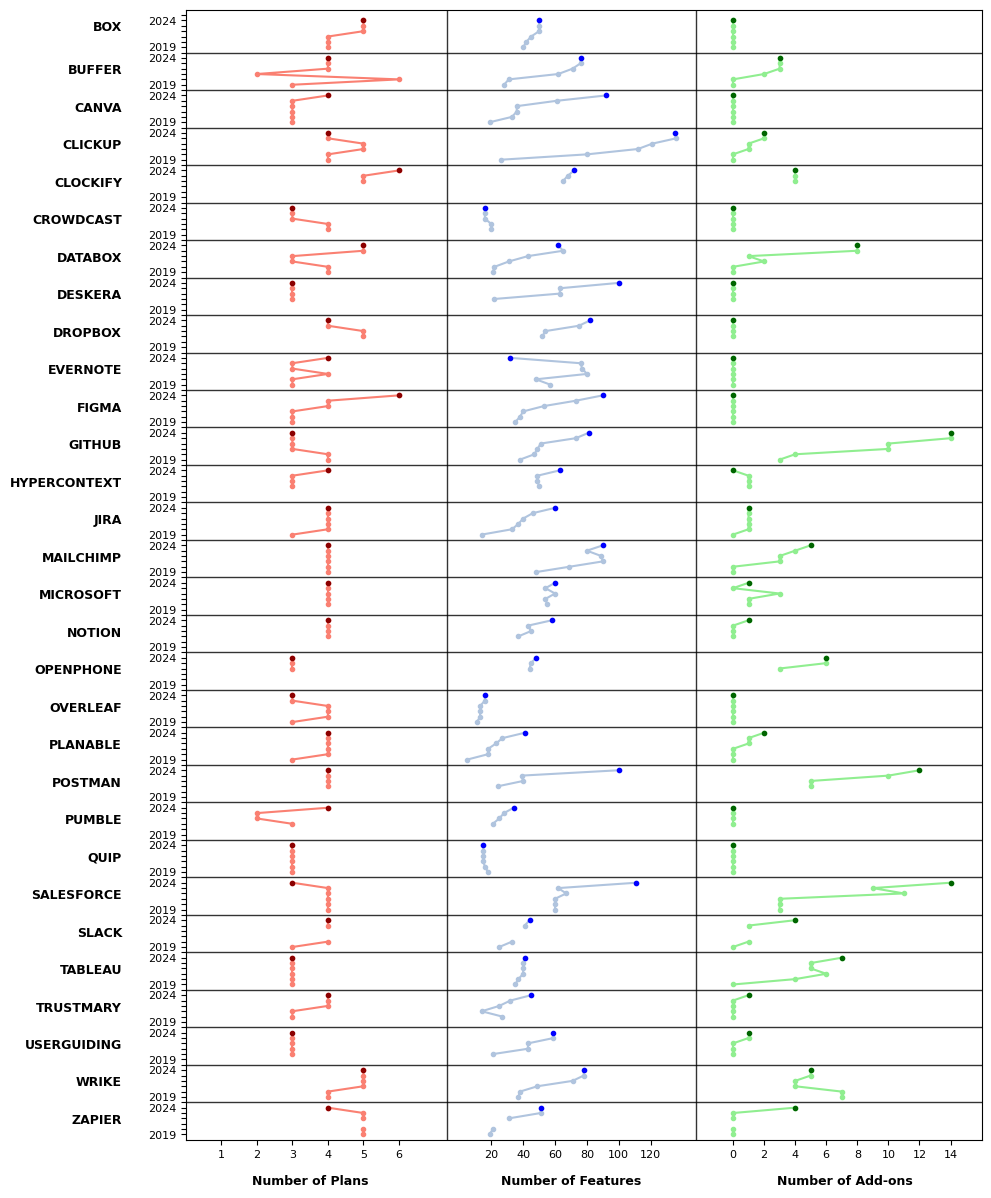

In [3]:
METRICS = ["Number of Plans", "Number of Features", "Number of Add-ons"]
GROUP_SIZE = len(STUDIED_YEARS)+1
X_SEPARATION = 10
FIG_HEIGHT = 12
X_AXIS_WIDTH = 300

TAGS_INTERVAL_PLANS = 1
TAGS_INTERVAL_FEATURES = 20
TAGS_INTERVAL_ADD_ONS = 2

RECTANGLE_WIDTH = X_AXIS_WIDTH//(len(METRICS))

def format_data_for_visualization(data, max_plans, max_features, max_add_ons):
    formatted_data = {}
    data_items = list(data.items())
    
    for i in range(len(data)):
        start_y_pos = i*GROUP_SIZE
        end_y_pos = start_y_pos + GROUP_SIZE - 1
        saas = data_items[i][0]
        saas_details = data_items[i][1]
        formatted_data[saas] = {'plans': {'x': [], 'y': []}, 'features': {'x': [], 'y': []}, 'add_ons': {'x': [], 'y': []}}

        for j in range(start_y_pos, end_y_pos):
            iter_index = j - start_y_pos
            year = STUDIED_YEARS[iter_index]
            year_data = saas_details[year]
            number_of_plans = None
            number_of_features = None
            number_of_add_ons = None

            if year_data is not None:
                number_of_plans = RECTANGLE_WIDTH/(max_plans + TAGS_INTERVAL_PLANS) * year_data['number_of_plans']
                number_of_features =  RECTANGLE_WIDTH + X_SEPARATION + RECTANGLE_WIDTH/(max_features + TAGS_INTERVAL_FEATURES) * year_data['number_of_features']
                number_of_add_ons = 2*RECTANGLE_WIDTH + 2*X_SEPARATION + RECTANGLE_WIDTH/(max_add_ons + TAGS_INTERVAL_ADD_ONS) * year_data['number_of_addons']

            formatted_data[saas]['plans']['x'].append(number_of_plans)
            formatted_data[saas]['features']['x'].append(number_of_features)
            formatted_data[saas]['add_ons']['x'].append(number_of_add_ons)
            formatted_data[saas]['plans']['y'].append(j)
            formatted_data[saas]['features']['y'].append(j)
            formatted_data[saas]['add_ons']['y'].append(j)
    
    return formatted_data

def generate_figure(dataset):

    data, max_plans, max_features, max_add_ons = get_data_from_dataset(dataset)

    formatted_data = format_data_for_visualization(data, max_plans, max_features, max_add_ons)

    ds_size = len(data)

    x_plans_ticks = list(np.arange(0, RECTANGLE_WIDTH+1, TAGS_INTERVAL_PLANS*RECTANGLE_WIDTH/(max_plans + TAGS_INTERVAL_PLANS)))[1:-1]
    x_features_ticks = list(np.arange(RECTANGLE_WIDTH+X_SEPARATION, 2*RECTANGLE_WIDTH+X_SEPARATION+1, TAGS_INTERVAL_FEATURES*RECTANGLE_WIDTH/(max_features + TAGS_INTERVAL_FEATURES)))[1:-1]
    x_add_ons_ticks = list(np.arange(2*RECTANGLE_WIDTH+2*X_SEPARATION, 3*RECTANGLE_WIDTH+2*X_SEPARATION+1, TAGS_INTERVAL_ADD_ONS*RECTANGLE_WIDTH/(max_add_ons + TAGS_INTERVAL_ADD_ONS)))[:-1]

    x_plans_tags = [i for i in range(1, max_plans + 1, TAGS_INTERVAL_PLANS)]
    x_features_tags = [i for i in range(TAGS_INTERVAL_FEATURES, max_features + 1, TAGS_INTERVAL_FEATURES)]
    x_add_ons_tags = [i for i in range(0, max_add_ons + 1, TAGS_INTERVAL_ADD_ONS)]

    x_ticks = x_plans_ticks + x_features_ticks + x_add_ons_ticks
    x_tags = x_plans_tags + x_features_tags + x_add_ons_tags
    y_range = range(ds_size*7)
    y_tags = ([STUDIED_YEARS[0]] + ["  "]*(len(STUDIED_YEARS)-2) + [STUDIED_YEARS[-1]] + ["  "])*ds_size

    fig, ax = plt.subplots(figsize=(10, FIG_HEIGHT))

    for _, values in formatted_data.items():
        ax.plot(values['plans']['x'], values['plans']['y'], marker='o', linestyle='-', color='salmon', markersize=3)
        ax.plot(values['features']['x'], values['features']['y'], marker='o', linestyle='-', color='lightsteelblue', markersize=3)
        ax.plot(values['add_ons']['x'], values['add_ons']['y'], marker='o', linestyle='-', color='lightgreen', markersize=3)
        
        filtered_plans_x = list(filter(lambda x: x is not None, values['plans']['x']))
        filtered_plans_y = list(filter(lambda y: y is not None, values['plans']['y']))
        filtered_features_x = list(filter(lambda x: x is not None, values['features']['x']))
        filtered_features_y = list(filter(lambda y: y is not None, values['features']['y']))
        filtered_add_ons_x = list(filter(lambda x: x is not None, values['add_ons']['x']))
        filtered_add_ons_y = list(filter(lambda y: y is not None, values['add_ons']['y']))
        
        ax.plot(filtered_plans_x[-1], filtered_plans_y[-1], marker='o', linestyle='-', color='darkred', markersize=3)  
        ax.plot(filtered_features_x[-1], filtered_features_y[-1], marker='o', linestyle='-', color='blue', markersize=3)
        ax.plot(filtered_add_ons_x[-1], filtered_add_ons_y[-1], marker='o', linestyle='-', color='darkgreen', markersize=3)
    
    ax.set_xticks(x_ticks, labels=x_tags)
    ax.set_yticks(y_range, labels=y_tags)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    yticks = ax.get_yticks()

    for i in range(0, len(yticks), 7):

        if i + 7 < len(yticks):
            group_label_position = (yticks[i] + yticks[i + 4]) / 2
        else:
            group_label_position = (yticks[i] + yticks[-1]) / 2
        
        separator_position = yticks[i-1]

        ax.text(-0.08, group_label_position, list(map(lambda x: x.upper(), formatted_data.keys()))[i//7], transform=ax.get_yaxis_transform(),
                horizontalalignment='right', fontsize=9, fontweight='bold')
        
        if i > 0:
            ax.axhline(y=separator_position, color='black', linestyle='-', linewidth=1, alpha=0.8)
            
    for i in range(len(METRICS)):
    
        x_separation_start_coef = i - 1
    
        if x_separation_start_coef < 0:
            x_separation_start_coef = 0

        tag_position = (i*RECTANGLE_WIDTH + x_separation_start_coef*X_SEPARATION + (i+1)*RECTANGLE_WIDTH+i*X_SEPARATION) / 2
    
        ax.text(tag_position, -0.04, METRICS[i], transform=ax.get_xaxis_transform(),
                horizontalalignment='center', fontsize=9, fontweight='bold')

    ax.axvline(x=RECTANGLE_WIDTH + X_SEPARATION/2, color='black', linestyle='-', linewidth=1, alpha=0.8)
    ax.axvline(x=2*RECTANGLE_WIDTH + X_SEPARATION/2, color='black', linestyle='-', linewidth=1, alpha=0.8)

    ax.set_xbound(0, 3*RECTANGLE_WIDTH + 2*X_SEPARATION)
    ax.set_ybound(-1, ds_size*7)
    plt.tight_layout()
    plt.savefig('../../figures/pricings_evolution.png')
    plt.show()

dataset = PricingsLoader('../../pricings')
generate_figure(dataset)

In the last two sentences  of the previous  cell we  import all the models and generate a figure showing the evolution of the number of plans, addons and features for all the SaaS.

### Generation of Data Frames and Exploratory Analysis

In [4]:
import pandas as pd

def build_dataframe(data):
    # Inicializamos una lista para almacenar los registros
    records = []

    # Iteramos a través del diccionario anidado
    for saas, years in data.items():
        for year, metrics in years.items():
            if metrics is not None:  # Verificamos si hay métricas disponibles para ese año
                # Creamos un registro con la estructura deseada y lo añadimos a la lista de registros
                record = {
                    'Saas': saas,
                    'Year': int(year),
                    'Plans': metrics.get('number_of_plans'),
                    'Features': metrics.get('number_of_features'),
                    'Addons': metrics.get('number_of_addons'),
                    'Has_Many_Products': metrics.get('has_many_products')
                }
                records.append(record)

    # Convertimos la lista de registros a un DataFrame de Pandas
    df = pd.DataFrame(records, columns=['Saas', 'Year', 'Plans', 'Features', 'Addons', 'Has_Many_Products'])
    return df
# Construcción del DataFrame
data, max_plans, max_features, max_add_ons = get_data_from_dataset(dataset)
df = build_dataframe(data)

# Mostrar el DataFrame
df

,Saas,Year,Plans,Features,Addons,Has_Many_Products
0,Zapier,2019,5,19,0,False
1,Zapier,2020,5,21,0,False
2,Zapier,2022,5,31,0,False
3,Zapier,2023,5,51,0,False
4,Zapier,2024,4,51,4,False
...,...,...,...,...,...,...
149,Box,2020,4,42,0,False
150,Box,2021,4,45,0,False
151,Box,2022,5,50,0,False
152,Box,2023,5,50,0,False


In [5]:
def normalize_columns(df, columns):
    # Normalization of the values for the specified columns
    for column in columns:
        col_min = df.groupby('Saas')[column].transform('min')
        col_max = df.groupby('Saas')[column].transform('max')
        dif = col_max - col_min                
        df[column + '_normalized'] = (df[column] - col_min) / dif
        df[column + '_normalized'] = df[column + '_normalized'].where(dif != 0, 1)
        df[column + '_min'] = col_min
        df[column + '_max'] = col_max
    return df

df_normalized = normalize_columns(df, ['Plans', 'Features', 'Addons'])

df_normalized

,Saas,Year,Plans,Features,Addons,Has_Many_Products,Plans_normalized,Plans_min,Plans_max,Features_normalized,Features_min,Features_max,Addons_normalized,Addons_min,Addons_max
0,Zapier,2019,5,19,0,False,1.0,4,5,0.0000,19,51,0.0,0,4
1,Zapier,2020,5,21,0,False,1.0,4,5,0.0625,19,51,0.0,0,4
2,Zapier,2022,5,31,0,False,1.0,4,5,0.3750,19,51,0.0,0,4
3,Zapier,2023,5,51,0,False,1.0,4,5,1.0000,19,51,0.0,0,4
4,Zapier,2024,4,51,4,False,0.0,4,5,1.0000,19,51,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Box,2020,4,42,0,False,0.0,4,5,0.2000,40,50,1.0,0,0
150,Box,2021,4,45,0,False,0.0,4,5,0.5000,40,50,1.0,0,0
151,Box,2022,5,50,0,False,1.0,4,5,1.0000,40,50,1.0,0,0
152,Box,2023,5,50,0,False,1.0,4,5,1.0000,40,50,1.0,0,0


In [6]:
# Save the dataframes as CSV
df.to_csv('saas_pricingplans.csv', index=False)
df_normalized.to_csv('saas_pricingplans_normalized.csv', index=False)

# Show the entire dataframes in this notebook:
display(Markdown("### SaaS Pricing Plans"))
display(Markdown(df.to_markdown()))
display(Markdown("### Normalized SaaS Pricing Plans"))
display(Markdown(df_normalized.to_markdown()))

### SaaS Pricing Plans

|     | Saas         |   Year |   Plans |   Features |   Addons | Has_Many_Products   |   Plans_normalized |   Plans_min |   Plans_max |   Features_normalized |   Features_min |   Features_max |   Addons_normalized |   Addons_min |   Addons_max |
|----:|:-------------|-------:|--------:|-----------:|---------:|:--------------------|-------------------:|------------:|------------:|----------------------:|---------------:|---------------:|--------------------:|-------------:|-------------:|
|   0 | Zapier       |   2019 |       5 |         19 |        0 | False               |           1        |           4 |           5 |             0         |             19 |             51 |           0         |            0 |            4 |
|   1 | Zapier       |   2020 |       5 |         21 |        0 | False               |           1        |           4 |           5 |             0.0625    |             19 |             51 |           0         |            0 |            4 |
|   2 | Zapier       |   2022 |       5 |         31 |        0 | False               |           1        |           4 |           5 |             0.375     |             19 |             51 |           0         |            0 |            4 |
|   3 | Zapier       |   2023 |       5 |         51 |        0 | False               |           1        |           4 |           5 |             1         |             19 |             51 |           0         |            0 |            4 |
|   4 | Zapier       |   2024 |       4 |         51 |        4 | False               |           0        |           4 |           5 |             1         |             19 |             51 |           1         |            0 |            4 |
|   5 | Wrike        |   2019 |       4 |         37 |        7 | False               |           0        |           4 |           5 |             0         |             37 |             78 |           1         |            4 |            7 |
|   6 | Wrike        |   2020 |       4 |         38 |        7 | False               |           0        |           4 |           5 |             0.0243902 |             37 |             78 |           1         |            4 |            7 |
|   7 | Wrike        |   2021 |       5 |         49 |        4 | False               |           1        |           4 |           5 |             0.292683  |             37 |             78 |           0         |            4 |            7 |
|   8 | Wrike        |   2022 |       5 |         71 |        4 | False               |           1        |           4 |           5 |             0.829268  |             37 |             78 |           0         |            4 |            7 |
|   9 | Wrike        |   2023 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  10 | Wrike        |   2024 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  11 | Userguiding  |   2020 |       3 |         21 |        0 | False               |           1        |           3 |           3 |             0         |             21 |             59 |           0         |            0 |            1 |
|  12 | Userguiding  |   2021 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.578947  |             21 |             59 |           0         |            0 |            1 |
|  13 | Userguiding  |   2022 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.578947  |             21 |             59 |           0         |            0 |            1 |
|  14 | Userguiding  |   2023 |       3 |         59 |        1 | False               |           1        |           3 |           3 |             1         |             21 |             59 |           1         |            0 |            1 |
|  15 | Trustmary    |   2020 |       3 |         27 |        0 | True                |           0        |           3 |           4 |             0.419355  |             14 |             45 |           0         |            0 |            1 |
|  16 | Trustmary    |   2021 |       3 |         14 |        0 | True                |           0        |           3 |           4 |             0         |             14 |             45 |           0         |            0 |            1 |
|  17 | Trustmary    |   2022 |       4 |         25 |        0 | False               |           1        |           3 |           4 |             0.354839  |             14 |             45 |           0         |            0 |            1 |
|  18 | Trustmary    |   2023 |       4 |         32 |        0 | True                |           1        |           3 |           4 |             0.580645  |             14 |             45 |           0         |            0 |            1 |
|  19 | Trustmary    |   2024 |       4 |         45 |        1 | True                |           1        |           3 |           4 |             1         |             14 |             45 |           1         |            0 |            1 |
|  20 | Tableau      |   2019 |       3 |         35 |        0 | False               |           1        |           3 |           3 |             0         |             35 |             41 |           0         |            0 |            7 |
|  21 | Tableau      |   2020 |       3 |         37 |        4 | False               |           1        |           3 |           3 |             0.333333  |             35 |             41 |           0.571429  |            0 |            7 |
|  22 | Tableau      |   2021 |       3 |         40 |        6 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.857143  |            0 |            7 |
|  23 | Tableau      |   2022 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  24 | Tableau      |   2023 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  25 | Tableau      |   2024 |       3 |         41 |        7 | False               |           1        |           3 |           3 |             1         |             35 |             41 |           1         |            0 |            7 |
|  26 | Slack        |   2019 |       3 |         25 |        0 | False               |           0        |           3 |           4 |             0         |             25 |             44 |           0         |            0 |            4 |
|  27 | Slack        |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.421053  |             25 |             44 |           0.25      |            0 |            4 |
|  28 | Slack        |   2023 |       4 |         41 |        1 | False               |           1        |           3 |           4 |             0.842105  |             25 |             44 |           0.25      |            0 |            4 |
|  29 | Slack        |   2024 |       4 |         44 |        4 | False               |           1        |           3 |           4 |             1         |             25 |             44 |           1         |            0 |            4 |
|  30 | Salesforce   |   2019 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  31 | Salesforce   |   2020 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  32 | Salesforce   |   2021 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  33 | Salesforce   |   2022 |       4 |         67 |       11 | True                |           1        |           3 |           4 |             0.137255  |             60 |            111 |           0.727273  |            3 |           14 |
|  34 | Salesforce   |   2023 |       4 |         62 |        9 | True                |           1        |           3 |           4 |             0.0392157 |             60 |            111 |           0.545455  |            3 |           14 |
|  35 | Salesforce   |   2024 |       3 |        111 |       14 | True                |           0        |           3 |           4 |             1         |             60 |            111 |           1         |            3 |           14 |
|  36 | Quip         |   2019 |       3 |         18 |        0 | False               |           1        |           3 |           3 |             1         |             15 |             18 |           1         |            0 |            0 |
|  37 | Quip         |   2020 |       3 |         16 |        0 | False               |           1        |           3 |           3 |             0.333333  |             15 |             18 |           1         |            0 |            0 |
|  38 | Quip         |   2021 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  39 | Quip         |   2022 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  40 | Quip         |   2023 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  41 | Quip         |   2024 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  42 | Pumble       |   2021 |       3 |         21 |        0 | False               |           0.5      |           2 |           4 |             0         |             21 |             34 |           1         |            0 |            0 |
|  43 | Pumble       |   2022 |       2 |         25 |        0 | False               |           0        |           2 |           4 |             0.307692  |             21 |             34 |           1         |            0 |            0 |
|  44 | Pumble       |   2023 |       2 |         28 |        0 | False               |           0        |           2 |           4 |             0.538462  |             21 |             34 |           1         |            0 |            0 |
|  45 | Pumble       |   2024 |       4 |         34 |        0 | False               |           1        |           2 |           4 |             1         |             21 |             34 |           1         |            0 |            0 |
|  46 | Postman      |   2021 |       4 |         24 |        5 | False               |           1        |           4 |           4 |             0         |             24 |            100 |           0         |            5 |           12 |
|  47 | Postman      |   2022 |       4 |         40 |        5 | False               |           1        |           4 |           4 |             0.210526  |             24 |            100 |           0         |            5 |           12 |
|  48 | Postman      |   2023 |       4 |         39 |       10 | False               |           1        |           4 |           4 |             0.197368  |             24 |            100 |           0.714286  |            5 |           12 |
|  49 | Postman      |   2024 |       4 |        100 |       12 | False               |           1        |           4 |           4 |             1         |             24 |            100 |           1         |            5 |           12 |
|  50 | Planable     |   2019 |       3 |          5 |        0 | False               |           0        |           3 |           4 |             0         |              5 |             41 |           0         |            0 |            2 |
|  51 | Planable     |   2020 |       4 |         18 |        0 | False               |           1        |           3 |           4 |             0.361111  |              5 |             41 |           0         |            0 |            2 |
|  52 | Planable     |   2021 |       4 |         18 |        0 | False               |           1        |           3 |           4 |             0.361111  |              5 |             41 |           0         |            0 |            2 |
|  53 | Planable     |   2022 |       4 |         23 |        1 | False               |           1        |           3 |           4 |             0.5       |              5 |             41 |           0.5       |            0 |            2 |
|  54 | Planable     |   2023 |       4 |         27 |        1 | False               |           1        |           3 |           4 |             0.611111  |              5 |             41 |           0.5       |            0 |            2 |
|  55 | Planable     |   2024 |       4 |         41 |        2 | False               |           1        |           3 |           4 |             1         |              5 |             41 |           1         |            0 |            2 |
|  56 | Overleaf     |   2019 |       3 |         11 |        0 | False               |           0        |           3 |           4 |             0         |             11 |             16 |           1         |            0 |            0 |
|  57 | Overleaf     |   2020 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  58 | Overleaf     |   2021 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  59 | Overleaf     |   2022 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  60 | Overleaf     |   2023 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  61 | Overleaf     |   2024 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  62 | Openphone    |   2022 |       3 |         44 |        3 | False               |           1        |           3 |           3 |             0         |             44 |             48 |           0         |            3 |            6 |
|  63 | Openphone    |   2023 |       3 |         45 |        6 | False               |           1        |           3 |           3 |             0.25      |             44 |             48 |           1         |            3 |            6 |
|  64 | Openphone    |   2024 |       3 |         48 |        6 | False               |           1        |           3 |           3 |             1         |             44 |             48 |           1         |            3 |            6 |
|  65 | Notion       |   2021 |       4 |         37 |        0 | False               |           1        |           4 |           4 |             0         |             37 |             58 |           0         |            0 |            1 |
|  66 | Notion       |   2022 |       4 |         45 |        0 | False               |           1        |           4 |           4 |             0.380952  |             37 |             58 |           0         |            0 |            1 |
|  67 | Notion       |   2023 |       4 |         43 |        0 | False               |           1        |           4 |           4 |             0.285714  |             37 |             58 |           0         |            0 |            1 |
|  68 | Notion       |   2024 |       4 |         58 |        1 | False               |           1        |           4 |           4 |             1         |             37 |             58 |           1         |            0 |            1 |
|  69 | Microsoft    |   2020 |       4 |         55 |        1 | True                |           1        |           4 |           4 |             0.166667  |             54 |             60 |           0.333333  |            0 |            3 |
|  70 | Microsoft    |   2021 |       4 |         54 |        1 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0.333333  |            0 |            3 |
|  71 | Microsoft    |   2022 |       4 |         60 |        3 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           1         |            0 |            3 |
|  72 | Microsoft    |   2023 |       4 |         54 |        0 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0         |            0 |            3 |
|  73 | Microsoft    |   2024 |       4 |         60 |        1 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           0.333333  |            0 |            3 |
|  74 | Mailchimp    |   2019 |       4 |         48 |        0 | False               |           1        |           4 |           4 |             0         |             48 |             90 |           0         |            0 |            5 |
|  75 | Mailchimp    |   2020 |       4 |         69 |        0 | False               |           1        |           4 |           4 |             0.5       |             48 |             90 |           0         |            0 |            5 |
|  76 | Mailchimp    |   2021 |       4 |         90 |        3 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           0.6       |            0 |            5 |
|  77 | Mailchimp    |   2022 |       4 |         89 |        3 | True                |           1        |           4 |           4 |             0.97619   |             48 |             90 |           0.6       |            0 |            5 |
|  78 | Mailchimp    |   2023 |       4 |         80 |        4 | True                |           1        |           4 |           4 |             0.761905  |             48 |             90 |           0.8       |            0 |            5 |
|  79 | Mailchimp    |   2024 |       4 |         90 |        5 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           1         |            0 |            5 |
|  80 | Jira         |   2019 |       3 |         14 |        0 | False               |           0        |           3 |           4 |             0         |             14 |             60 |           0         |            0 |            1 |
|  81 | Jira         |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.413043  |             14 |             60 |           1         |            0 |            1 |
|  82 | Jira         |   2021 |       4 |         37 |        1 | False               |           1        |           3 |           4 |             0.5       |             14 |             60 |           1         |            0 |            1 |
|  83 | Jira         |   2022 |       4 |         40 |        1 | False               |           1        |           3 |           4 |             0.565217  |             14 |             60 |           1         |            0 |            1 |
|  84 | Jira         |   2023 |       4 |         46 |        1 | False               |           1        |           3 |           4 |             0.695652  |             14 |             60 |           1         |            0 |            1 |
|  85 | Jira         |   2024 |       4 |         60 |        1 | False               |           1        |           3 |           4 |             1         |             14 |             60 |           1         |            0 |            1 |
|  86 | Hypercontext |   2021 |       3 |         50 |        1 | False               |           0        |           3 |           4 |             0.0714286 |             49 |             63 |           1         |            0 |            1 |
|  87 | Hypercontext |   2022 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  88 | Hypercontext |   2023 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  89 | Hypercontext |   2024 |       4 |         63 |        0 | False               |           1        |           3 |           4 |             1         |             49 |             63 |           0         |            0 |            1 |
|  90 | Github       |   2019 |       4 |         38 |        3 | False               |           1        |           3 |           4 |             0         |             38 |             81 |           0         |            3 |           14 |
|  91 | Github       |   2020 |       4 |         47 |        4 | False               |           1        |           3 |           4 |             0.209302  |             38 |             81 |           0.0909091 |            3 |           14 |
|  92 | Github       |   2021 |       3 |         49 |       10 | False               |           0        |           3 |           4 |             0.255814  |             38 |             81 |           0.636364  |            3 |           14 |
|  93 | Github       |   2022 |       3 |         51 |       10 | False               |           0        |           3 |           4 |             0.302326  |             38 |             81 |           0.636364  |            3 |           14 |
|  94 | Github       |   2023 |       3 |         73 |       14 | False               |           0        |           3 |           4 |             0.813953  |             38 |             81 |           1         |            3 |           14 |
|  95 | Github       |   2024 |       3 |         81 |       14 | False               |           0        |           3 |           4 |             1         |             38 |             81 |           1         |            3 |           14 |
|  96 | Figma        |   2019 |       3 |         35 |        0 | False               |           0        |           3 |           6 |             0         |             35 |             90 |           1         |            0 |            0 |
|  97 | Figma        |   2020 |       3 |         38 |        0 | False               |           0        |           3 |           6 |             0.0545455 |             35 |             90 |           1         |            0 |            0 |
|  98 | Figma        |   2021 |       3 |         40 |        0 | False               |           0        |           3 |           6 |             0.0909091 |             35 |             90 |           1         |            0 |            0 |
|  99 | Figma        |   2022 |       4 |         53 |        0 | False               |           0.333333 |           3 |           6 |             0.327273  |             35 |             90 |           1         |            0 |            0 |
| 100 | Figma        |   2023 |       4 |         73 |        0 | False               |           0.333333 |           3 |           6 |             0.690909  |             35 |             90 |           1         |            0 |            0 |
| 101 | Figma        |   2024 |       6 |         90 |        0 | False               |           1        |           3 |           6 |             1         |             35 |             90 |           1         |            0 |            0 |
| 102 | Evernote     |   2019 |       3 |         57 |        0 | False               |           0        |           3 |           4 |             0.520833  |             32 |             80 |           1         |            0 |            0 |
| 103 | Evernote     |   2020 |       3 |         48 |        0 | False               |           0        |           3 |           4 |             0.333333  |             32 |             80 |           1         |            0 |            0 |
| 104 | Evernote     |   2021 |       4 |         80 |        0 | False               |           1        |           3 |           4 |             1         |             32 |             80 |           1         |            0 |            0 |
| 105 | Evernote     |   2022 |       3 |         77 |        0 | False               |           0        |           3 |           4 |             0.9375    |             32 |             80 |           1         |            0 |            0 |
| 106 | Evernote     |   2023 |       3 |         76 |        0 | False               |           0        |           3 |           4 |             0.916667  |             32 |             80 |           1         |            0 |            0 |
| 107 | Evernote     |   2024 |       4 |         32 |        0 | False               |           1        |           3 |           4 |             0         |             32 |             80 |           1         |            0 |            0 |
| 108 | Dropbox      |   2021 |       5 |         52 |        0 | False               |           1        |           4 |           5 |             0         |             52 |             82 |           1         |            0 |            0 |
| 109 | Dropbox      |   2022 |       5 |         54 |        0 | False               |           1        |           4 |           5 |             0.0666667 |             52 |             82 |           1         |            0 |            0 |
| 110 | Dropbox      |   2023 |       4 |         75 |        0 | False               |           0        |           4 |           5 |             0.766667  |             52 |             82 |           1         |            0 |            0 |
| 111 | Dropbox      |   2024 |       4 |         82 |        0 | False               |           0        |           4 |           5 |             1         |             52 |             82 |           1         |            0 |            0 |
| 112 | Deskera      |   2021 |       3 |         22 |        0 | False               |           1        |           3 |           3 |             0         |             22 |            100 |           1         |            0 |            0 |
| 113 | Deskera      |   2022 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 114 | Deskera      |   2023 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 115 | Deskera      |   2024 |       3 |        100 |        0 | False               |           1        |           3 |           3 |             1         |             22 |            100 |           1         |            0 |            0 |
| 116 | Databox      |   2019 |       4 |         21 |        0 | False               |           0.5      |           3 |           5 |             0         |             21 |             65 |           0         |            0 |            8 |
| 117 | Databox      |   2020 |       4 |         22 |        0 | False               |           0.5      |           3 |           5 |             0.0227273 |             21 |             65 |           0         |            0 |            8 |
| 118 | Databox      |   2021 |       3 |         31 |        2 | False               |           0        |           3 |           5 |             0.227273  |             21 |             65 |           0.25      |            0 |            8 |
| 119 | Databox      |   2022 |       3 |         43 |        1 | False               |           0        |           3 |           5 |             0.5       |             21 |             65 |           0.125     |            0 |            8 |
| 120 | Databox      |   2023 |       5 |         65 |        8 | False               |           1        |           3 |           5 |             1         |             21 |             65 |           1         |            0 |            8 |
| 121 | Databox      |   2024 |       5 |         62 |        8 | False               |           1        |           3 |           5 |             0.931818  |             21 |             65 |           1         |            0 |            8 |
| 122 | Crowdcast    |   2020 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 123 | Crowdcast    |   2021 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 124 | Crowdcast    |   2022 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 125 | Crowdcast    |   2023 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 126 | Crowdcast    |   2024 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 127 | Clockify     |   2022 |       5 |         65 |        4 | False               |           0        |           5 |           6 |             0         |             65 |             72 |           1         |            4 |            4 |
| 128 | Clockify     |   2023 |       5 |         68 |        4 | False               |           0        |           5 |           6 |             0.428571  |             65 |             72 |           1         |            4 |            4 |
| 129 | Clockify     |   2024 |       6 |         72 |        4 | False               |           1        |           5 |           6 |             1         |             65 |             72 |           1         |            4 |            4 |
| 130 | Clickup      |   2019 |       4 |         26 |        0 | False               |           0        |           4 |           5 |             0         |             26 |            136 |           0         |            0 |            2 |
| 131 | Clickup      |   2020 |       4 |         80 |        0 | False               |           0        |           4 |           5 |             0.490909  |             26 |            136 |           0         |            0 |            2 |
| 132 | Clickup      |   2021 |       5 |        112 |        1 | False               |           1        |           4 |           5 |             0.781818  |             26 |            136 |           0.5       |            0 |            2 |
| 133 | Clickup      |   2022 |       5 |        121 |        1 | False               |           1        |           4 |           5 |             0.863636  |             26 |            136 |           0.5       |            0 |            2 |
| 134 | Clickup      |   2023 |       4 |        136 |        2 | False               |           0        |           4 |           5 |             1         |             26 |            136 |           1         |            0 |            2 |
| 135 | Clickup      |   2024 |       4 |        135 |        2 | False               |           0        |           4 |           5 |             0.990909  |             26 |            136 |           1         |            0 |            2 |
| 136 | Canva        |   2019 |       3 |         19 |        0 | False               |           0        |           3 |           4 |             0         |             19 |             92 |           1         |            0 |            0 |
| 137 | Canva        |   2020 |       3 |         33 |        0 | False               |           0        |           3 |           4 |             0.191781  |             19 |             92 |           1         |            0 |            0 |
| 138 | Canva        |   2021 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 139 | Canva        |   2022 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 140 | Canva        |   2023 |       3 |         61 |        0 | False               |           0        |           3 |           4 |             0.575342  |             19 |             92 |           1         |            0 |            0 |
| 141 | Canva        |   2024 |       4 |         92 |        0 | False               |           1        |           3 |           4 |             1         |             19 |             92 |           1         |            0 |            0 |
| 142 | Buffer       |   2019 |       3 |         28 |        0 | True                |           0.25     |           2 |           6 |             0         |             28 |             76 |           0         |            0 |            3 |
| 143 | Buffer       |   2020 |       6 |         31 |        0 | True                |           1        |           2 |           6 |             0.0625    |             28 |             76 |           0         |            0 |            3 |
| 144 | Buffer       |   2021 |       2 |         62 |        2 | False               |           0        |           2 |           6 |             0.708333  |             28 |             76 |           0.666667  |            0 |            3 |
| 145 | Buffer       |   2022 |       4 |         71 |        3 | False               |           0.5      |           2 |           6 |             0.895833  |             28 |             76 |           1         |            0 |            3 |
| 146 | Buffer       |   2023 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 147 | Buffer       |   2024 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 148 | Box          |   2019 |       4 |         40 |        0 | False               |           0        |           4 |           5 |             0         |             40 |             50 |           1         |            0 |            0 |
| 149 | Box          |   2020 |       4 |         42 |        0 | False               |           0        |           4 |           5 |             0.2       |             40 |             50 |           1         |            0 |            0 |
| 150 | Box          |   2021 |       4 |         45 |        0 | False               |           0        |           4 |           5 |             0.5       |             40 |             50 |           1         |            0 |            0 |
| 151 | Box          |   2022 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 152 | Box          |   2023 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 153 | Box          |   2024 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |

### Normalized SaaS Pricing Plans

|     | Saas         |   Year |   Plans |   Features |   Addons | Has_Many_Products   |   Plans_normalized |   Plans_min |   Plans_max |   Features_normalized |   Features_min |   Features_max |   Addons_normalized |   Addons_min |   Addons_max |
|----:|:-------------|-------:|--------:|-----------:|---------:|:--------------------|-------------------:|------------:|------------:|----------------------:|---------------:|---------------:|--------------------:|-------------:|-------------:|
|   0 | Zapier       |   2019 |       5 |         19 |        0 | False               |           1        |           4 |           5 |             0         |             19 |             51 |           0         |            0 |            4 |
|   1 | Zapier       |   2020 |       5 |         21 |        0 | False               |           1        |           4 |           5 |             0.0625    |             19 |             51 |           0         |            0 |            4 |
|   2 | Zapier       |   2022 |       5 |         31 |        0 | False               |           1        |           4 |           5 |             0.375     |             19 |             51 |           0         |            0 |            4 |
|   3 | Zapier       |   2023 |       5 |         51 |        0 | False               |           1        |           4 |           5 |             1         |             19 |             51 |           0         |            0 |            4 |
|   4 | Zapier       |   2024 |       4 |         51 |        4 | False               |           0        |           4 |           5 |             1         |             19 |             51 |           1         |            0 |            4 |
|   5 | Wrike        |   2019 |       4 |         37 |        7 | False               |           0        |           4 |           5 |             0         |             37 |             78 |           1         |            4 |            7 |
|   6 | Wrike        |   2020 |       4 |         38 |        7 | False               |           0        |           4 |           5 |             0.0243902 |             37 |             78 |           1         |            4 |            7 |
|   7 | Wrike        |   2021 |       5 |         49 |        4 | False               |           1        |           4 |           5 |             0.292683  |             37 |             78 |           0         |            4 |            7 |
|   8 | Wrike        |   2022 |       5 |         71 |        4 | False               |           1        |           4 |           5 |             0.829268  |             37 |             78 |           0         |            4 |            7 |
|   9 | Wrike        |   2023 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  10 | Wrike        |   2024 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  11 | Userguiding  |   2020 |       3 |         21 |        0 | False               |           1        |           3 |           3 |             0         |             21 |             59 |           0         |            0 |            1 |
|  12 | Userguiding  |   2021 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.578947  |             21 |             59 |           0         |            0 |            1 |
|  13 | Userguiding  |   2022 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.578947  |             21 |             59 |           0         |            0 |            1 |
|  14 | Userguiding  |   2023 |       3 |         59 |        1 | False               |           1        |           3 |           3 |             1         |             21 |             59 |           1         |            0 |            1 |
|  15 | Trustmary    |   2020 |       3 |         27 |        0 | True                |           0        |           3 |           4 |             0.419355  |             14 |             45 |           0         |            0 |            1 |
|  16 | Trustmary    |   2021 |       3 |         14 |        0 | True                |           0        |           3 |           4 |             0         |             14 |             45 |           0         |            0 |            1 |
|  17 | Trustmary    |   2022 |       4 |         25 |        0 | False               |           1        |           3 |           4 |             0.354839  |             14 |             45 |           0         |            0 |            1 |
|  18 | Trustmary    |   2023 |       4 |         32 |        0 | True                |           1        |           3 |           4 |             0.580645  |             14 |             45 |           0         |            0 |            1 |
|  19 | Trustmary    |   2024 |       4 |         45 |        1 | True                |           1        |           3 |           4 |             1         |             14 |             45 |           1         |            0 |            1 |
|  20 | Tableau      |   2019 |       3 |         35 |        0 | False               |           1        |           3 |           3 |             0         |             35 |             41 |           0         |            0 |            7 |
|  21 | Tableau      |   2020 |       3 |         37 |        4 | False               |           1        |           3 |           3 |             0.333333  |             35 |             41 |           0.571429  |            0 |            7 |
|  22 | Tableau      |   2021 |       3 |         40 |        6 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.857143  |            0 |            7 |
|  23 | Tableau      |   2022 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  24 | Tableau      |   2023 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  25 | Tableau      |   2024 |       3 |         41 |        7 | False               |           1        |           3 |           3 |             1         |             35 |             41 |           1         |            0 |            7 |
|  26 | Slack        |   2019 |       3 |         25 |        0 | False               |           0        |           3 |           4 |             0         |             25 |             44 |           0         |            0 |            4 |
|  27 | Slack        |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.421053  |             25 |             44 |           0.25      |            0 |            4 |
|  28 | Slack        |   2023 |       4 |         41 |        1 | False               |           1        |           3 |           4 |             0.842105  |             25 |             44 |           0.25      |            0 |            4 |
|  29 | Slack        |   2024 |       4 |         44 |        4 | False               |           1        |           3 |           4 |             1         |             25 |             44 |           1         |            0 |            4 |
|  30 | Salesforce   |   2019 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  31 | Salesforce   |   2020 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  32 | Salesforce   |   2021 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  33 | Salesforce   |   2022 |       4 |         67 |       11 | True                |           1        |           3 |           4 |             0.137255  |             60 |            111 |           0.727273  |            3 |           14 |
|  34 | Salesforce   |   2023 |       4 |         62 |        9 | True                |           1        |           3 |           4 |             0.0392157 |             60 |            111 |           0.545455  |            3 |           14 |
|  35 | Salesforce   |   2024 |       3 |        111 |       14 | True                |           0        |           3 |           4 |             1         |             60 |            111 |           1         |            3 |           14 |
|  36 | Quip         |   2019 |       3 |         18 |        0 | False               |           1        |           3 |           3 |             1         |             15 |             18 |           1         |            0 |            0 |
|  37 | Quip         |   2020 |       3 |         16 |        0 | False               |           1        |           3 |           3 |             0.333333  |             15 |             18 |           1         |            0 |            0 |
|  38 | Quip         |   2021 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  39 | Quip         |   2022 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  40 | Quip         |   2023 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  41 | Quip         |   2024 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  42 | Pumble       |   2021 |       3 |         21 |        0 | False               |           0.5      |           2 |           4 |             0         |             21 |             34 |           1         |            0 |            0 |
|  43 | Pumble       |   2022 |       2 |         25 |        0 | False               |           0        |           2 |           4 |             0.307692  |             21 |             34 |           1         |            0 |            0 |
|  44 | Pumble       |   2023 |       2 |         28 |        0 | False               |           0        |           2 |           4 |             0.538462  |             21 |             34 |           1         |            0 |            0 |
|  45 | Pumble       |   2024 |       4 |         34 |        0 | False               |           1        |           2 |           4 |             1         |             21 |             34 |           1         |            0 |            0 |
|  46 | Postman      |   2021 |       4 |         24 |        5 | False               |           1        |           4 |           4 |             0         |             24 |            100 |           0         |            5 |           12 |
|  47 | Postman      |   2022 |       4 |         40 |        5 | False               |           1        |           4 |           4 |             0.210526  |             24 |            100 |           0         |            5 |           12 |
|  48 | Postman      |   2023 |       4 |         39 |       10 | False               |           1        |           4 |           4 |             0.197368  |             24 |            100 |           0.714286  |            5 |           12 |
|  49 | Postman      |   2024 |       4 |        100 |       12 | False               |           1        |           4 |           4 |             1         |             24 |            100 |           1         |            5 |           12 |
|  50 | Planable     |   2019 |       3 |          5 |        0 | False               |           0        |           3 |           4 |             0         |              5 |             41 |           0         |            0 |            2 |
|  51 | Planable     |   2020 |       4 |         18 |        0 | False               |           1        |           3 |           4 |             0.361111  |              5 |             41 |           0         |            0 |            2 |
|  52 | Planable     |   2021 |       4 |         18 |        0 | False               |           1        |           3 |           4 |             0.361111  |              5 |             41 |           0         |            0 |            2 |
|  53 | Planable     |   2022 |       4 |         23 |        1 | False               |           1        |           3 |           4 |             0.5       |              5 |             41 |           0.5       |            0 |            2 |
|  54 | Planable     |   2023 |       4 |         27 |        1 | False               |           1        |           3 |           4 |             0.611111  |              5 |             41 |           0.5       |            0 |            2 |
|  55 | Planable     |   2024 |       4 |         41 |        2 | False               |           1        |           3 |           4 |             1         |              5 |             41 |           1         |            0 |            2 |
|  56 | Overleaf     |   2019 |       3 |         11 |        0 | False               |           0        |           3 |           4 |             0         |             11 |             16 |           1         |            0 |            0 |
|  57 | Overleaf     |   2020 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  58 | Overleaf     |   2021 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  59 | Overleaf     |   2022 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  60 | Overleaf     |   2023 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  61 | Overleaf     |   2024 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  62 | Openphone    |   2022 |       3 |         44 |        3 | False               |           1        |           3 |           3 |             0         |             44 |             48 |           0         |            3 |            6 |
|  63 | Openphone    |   2023 |       3 |         45 |        6 | False               |           1        |           3 |           3 |             0.25      |             44 |             48 |           1         |            3 |            6 |
|  64 | Openphone    |   2024 |       3 |         48 |        6 | False               |           1        |           3 |           3 |             1         |             44 |             48 |           1         |            3 |            6 |
|  65 | Notion       |   2021 |       4 |         37 |        0 | False               |           1        |           4 |           4 |             0         |             37 |             58 |           0         |            0 |            1 |
|  66 | Notion       |   2022 |       4 |         45 |        0 | False               |           1        |           4 |           4 |             0.380952  |             37 |             58 |           0         |            0 |            1 |
|  67 | Notion       |   2023 |       4 |         43 |        0 | False               |           1        |           4 |           4 |             0.285714  |             37 |             58 |           0         |            0 |            1 |
|  68 | Notion       |   2024 |       4 |         58 |        1 | False               |           1        |           4 |           4 |             1         |             37 |             58 |           1         |            0 |            1 |
|  69 | Microsoft    |   2020 |       4 |         55 |        1 | True                |           1        |           4 |           4 |             0.166667  |             54 |             60 |           0.333333  |            0 |            3 |
|  70 | Microsoft    |   2021 |       4 |         54 |        1 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0.333333  |            0 |            3 |
|  71 | Microsoft    |   2022 |       4 |         60 |        3 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           1         |            0 |            3 |
|  72 | Microsoft    |   2023 |       4 |         54 |        0 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0         |            0 |            3 |
|  73 | Microsoft    |   2024 |       4 |         60 |        1 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           0.333333  |            0 |            3 |
|  74 | Mailchimp    |   2019 |       4 |         48 |        0 | False               |           1        |           4 |           4 |             0         |             48 |             90 |           0         |            0 |            5 |
|  75 | Mailchimp    |   2020 |       4 |         69 |        0 | False               |           1        |           4 |           4 |             0.5       |             48 |             90 |           0         |            0 |            5 |
|  76 | Mailchimp    |   2021 |       4 |         90 |        3 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           0.6       |            0 |            5 |
|  77 | Mailchimp    |   2022 |       4 |         89 |        3 | True                |           1        |           4 |           4 |             0.97619   |             48 |             90 |           0.6       |            0 |            5 |
|  78 | Mailchimp    |   2023 |       4 |         80 |        4 | True                |           1        |           4 |           4 |             0.761905  |             48 |             90 |           0.8       |            0 |            5 |
|  79 | Mailchimp    |   2024 |       4 |         90 |        5 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           1         |            0 |            5 |
|  80 | Jira         |   2019 |       3 |         14 |        0 | False               |           0        |           3 |           4 |             0         |             14 |             60 |           0         |            0 |            1 |
|  81 | Jira         |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.413043  |             14 |             60 |           1         |            0 |            1 |
|  82 | Jira         |   2021 |       4 |         37 |        1 | False               |           1        |           3 |           4 |             0.5       |             14 |             60 |           1         |            0 |            1 |
|  83 | Jira         |   2022 |       4 |         40 |        1 | False               |           1        |           3 |           4 |             0.565217  |             14 |             60 |           1         |            0 |            1 |
|  84 | Jira         |   2023 |       4 |         46 |        1 | False               |           1        |           3 |           4 |             0.695652  |             14 |             60 |           1         |            0 |            1 |
|  85 | Jira         |   2024 |       4 |         60 |        1 | False               |           1        |           3 |           4 |             1         |             14 |             60 |           1         |            0 |            1 |
|  86 | Hypercontext |   2021 |       3 |         50 |        1 | False               |           0        |           3 |           4 |             0.0714286 |             49 |             63 |           1         |            0 |            1 |
|  87 | Hypercontext |   2022 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  88 | Hypercontext |   2023 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  89 | Hypercontext |   2024 |       4 |         63 |        0 | False               |           1        |           3 |           4 |             1         |             49 |             63 |           0         |            0 |            1 |
|  90 | Github       |   2019 |       4 |         38 |        3 | False               |           1        |           3 |           4 |             0         |             38 |             81 |           0         |            3 |           14 |
|  91 | Github       |   2020 |       4 |         47 |        4 | False               |           1        |           3 |           4 |             0.209302  |             38 |             81 |           0.0909091 |            3 |           14 |
|  92 | Github       |   2021 |       3 |         49 |       10 | False               |           0        |           3 |           4 |             0.255814  |             38 |             81 |           0.636364  |            3 |           14 |
|  93 | Github       |   2022 |       3 |         51 |       10 | False               |           0        |           3 |           4 |             0.302326  |             38 |             81 |           0.636364  |            3 |           14 |
|  94 | Github       |   2023 |       3 |         73 |       14 | False               |           0        |           3 |           4 |             0.813953  |             38 |             81 |           1         |            3 |           14 |
|  95 | Github       |   2024 |       3 |         81 |       14 | False               |           0        |           3 |           4 |             1         |             38 |             81 |           1         |            3 |           14 |
|  96 | Figma        |   2019 |       3 |         35 |        0 | False               |           0        |           3 |           6 |             0         |             35 |             90 |           1         |            0 |            0 |
|  97 | Figma        |   2020 |       3 |         38 |        0 | False               |           0        |           3 |           6 |             0.0545455 |             35 |             90 |           1         |            0 |            0 |
|  98 | Figma        |   2021 |       3 |         40 |        0 | False               |           0        |           3 |           6 |             0.0909091 |             35 |             90 |           1         |            0 |            0 |
|  99 | Figma        |   2022 |       4 |         53 |        0 | False               |           0.333333 |           3 |           6 |             0.327273  |             35 |             90 |           1         |            0 |            0 |
| 100 | Figma        |   2023 |       4 |         73 |        0 | False               |           0.333333 |           3 |           6 |             0.690909  |             35 |             90 |           1         |            0 |            0 |
| 101 | Figma        |   2024 |       6 |         90 |        0 | False               |           1        |           3 |           6 |             1         |             35 |             90 |           1         |            0 |            0 |
| 102 | Evernote     |   2019 |       3 |         57 |        0 | False               |           0        |           3 |           4 |             0.520833  |             32 |             80 |           1         |            0 |            0 |
| 103 | Evernote     |   2020 |       3 |         48 |        0 | False               |           0        |           3 |           4 |             0.333333  |             32 |             80 |           1         |            0 |            0 |
| 104 | Evernote     |   2021 |       4 |         80 |        0 | False               |           1        |           3 |           4 |             1         |             32 |             80 |           1         |            0 |            0 |
| 105 | Evernote     |   2022 |       3 |         77 |        0 | False               |           0        |           3 |           4 |             0.9375    |             32 |             80 |           1         |            0 |            0 |
| 106 | Evernote     |   2023 |       3 |         76 |        0 | False               |           0        |           3 |           4 |             0.916667  |             32 |             80 |           1         |            0 |            0 |
| 107 | Evernote     |   2024 |       4 |         32 |        0 | False               |           1        |           3 |           4 |             0         |             32 |             80 |           1         |            0 |            0 |
| 108 | Dropbox      |   2021 |       5 |         52 |        0 | False               |           1        |           4 |           5 |             0         |             52 |             82 |           1         |            0 |            0 |
| 109 | Dropbox      |   2022 |       5 |         54 |        0 | False               |           1        |           4 |           5 |             0.0666667 |             52 |             82 |           1         |            0 |            0 |
| 110 | Dropbox      |   2023 |       4 |         75 |        0 | False               |           0        |           4 |           5 |             0.766667  |             52 |             82 |           1         |            0 |            0 |
| 111 | Dropbox      |   2024 |       4 |         82 |        0 | False               |           0        |           4 |           5 |             1         |             52 |             82 |           1         |            0 |            0 |
| 112 | Deskera      |   2021 |       3 |         22 |        0 | False               |           1        |           3 |           3 |             0         |             22 |            100 |           1         |            0 |            0 |
| 113 | Deskera      |   2022 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 114 | Deskera      |   2023 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 115 | Deskera      |   2024 |       3 |        100 |        0 | False               |           1        |           3 |           3 |             1         |             22 |            100 |           1         |            0 |            0 |
| 116 | Databox      |   2019 |       4 |         21 |        0 | False               |           0.5      |           3 |           5 |             0         |             21 |             65 |           0         |            0 |            8 |
| 117 | Databox      |   2020 |       4 |         22 |        0 | False               |           0.5      |           3 |           5 |             0.0227273 |             21 |             65 |           0         |            0 |            8 |
| 118 | Databox      |   2021 |       3 |         31 |        2 | False               |           0        |           3 |           5 |             0.227273  |             21 |             65 |           0.25      |            0 |            8 |
| 119 | Databox      |   2022 |       3 |         43 |        1 | False               |           0        |           3 |           5 |             0.5       |             21 |             65 |           0.125     |            0 |            8 |
| 120 | Databox      |   2023 |       5 |         65 |        8 | False               |           1        |           3 |           5 |             1         |             21 |             65 |           1         |            0 |            8 |
| 121 | Databox      |   2024 |       5 |         62 |        8 | False               |           1        |           3 |           5 |             0.931818  |             21 |             65 |           1         |            0 |            8 |
| 122 | Crowdcast    |   2020 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 123 | Crowdcast    |   2021 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 124 | Crowdcast    |   2022 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 125 | Crowdcast    |   2023 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 126 | Crowdcast    |   2024 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 127 | Clockify     |   2022 |       5 |         65 |        4 | False               |           0        |           5 |           6 |             0         |             65 |             72 |           1         |            4 |            4 |
| 128 | Clockify     |   2023 |       5 |         68 |        4 | False               |           0        |           5 |           6 |             0.428571  |             65 |             72 |           1         |            4 |            4 |
| 129 | Clockify     |   2024 |       6 |         72 |        4 | False               |           1        |           5 |           6 |             1         |             65 |             72 |           1         |            4 |            4 |
| 130 | Clickup      |   2019 |       4 |         26 |        0 | False               |           0        |           4 |           5 |             0         |             26 |            136 |           0         |            0 |            2 |
| 131 | Clickup      |   2020 |       4 |         80 |        0 | False               |           0        |           4 |           5 |             0.490909  |             26 |            136 |           0         |            0 |            2 |
| 132 | Clickup      |   2021 |       5 |        112 |        1 | False               |           1        |           4 |           5 |             0.781818  |             26 |            136 |           0.5       |            0 |            2 |
| 133 | Clickup      |   2022 |       5 |        121 |        1 | False               |           1        |           4 |           5 |             0.863636  |             26 |            136 |           0.5       |            0 |            2 |
| 134 | Clickup      |   2023 |       4 |        136 |        2 | False               |           0        |           4 |           5 |             1         |             26 |            136 |           1         |            0 |            2 |
| 135 | Clickup      |   2024 |       4 |        135 |        2 | False               |           0        |           4 |           5 |             0.990909  |             26 |            136 |           1         |            0 |            2 |
| 136 | Canva        |   2019 |       3 |         19 |        0 | False               |           0        |           3 |           4 |             0         |             19 |             92 |           1         |            0 |            0 |
| 137 | Canva        |   2020 |       3 |         33 |        0 | False               |           0        |           3 |           4 |             0.191781  |             19 |             92 |           1         |            0 |            0 |
| 138 | Canva        |   2021 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 139 | Canva        |   2022 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 140 | Canva        |   2023 |       3 |         61 |        0 | False               |           0        |           3 |           4 |             0.575342  |             19 |             92 |           1         |            0 |            0 |
| 141 | Canva        |   2024 |       4 |         92 |        0 | False               |           1        |           3 |           4 |             1         |             19 |             92 |           1         |            0 |            0 |
| 142 | Buffer       |   2019 |       3 |         28 |        0 | True                |           0.25     |           2 |           6 |             0         |             28 |             76 |           0         |            0 |            3 |
| 143 | Buffer       |   2020 |       6 |         31 |        0 | True                |           1        |           2 |           6 |             0.0625    |             28 |             76 |           0         |            0 |            3 |
| 144 | Buffer       |   2021 |       2 |         62 |        2 | False               |           0        |           2 |           6 |             0.708333  |             28 |             76 |           0.666667  |            0 |            3 |
| 145 | Buffer       |   2022 |       4 |         71 |        3 | False               |           0.5      |           2 |           6 |             0.895833  |             28 |             76 |           1         |            0 |            3 |
| 146 | Buffer       |   2023 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 147 | Buffer       |   2024 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 148 | Box          |   2019 |       4 |         40 |        0 | False               |           0        |           4 |           5 |             0         |             40 |             50 |           1         |            0 |            0 |
| 149 | Box          |   2020 |       4 |         42 |        0 | False               |           0        |           4 |           5 |             0.2       |             40 |             50 |           1         |            0 |            0 |
| 150 | Box          |   2021 |       4 |         45 |        0 | False               |           0        |           4 |           5 |             0.5       |             40 |             50 |           1         |            0 |            0 |
| 151 | Box          |   2022 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 152 | Box          |   2023 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 153 | Box          |   2024 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |

<Figure size 1200x800 with 0 Axes>

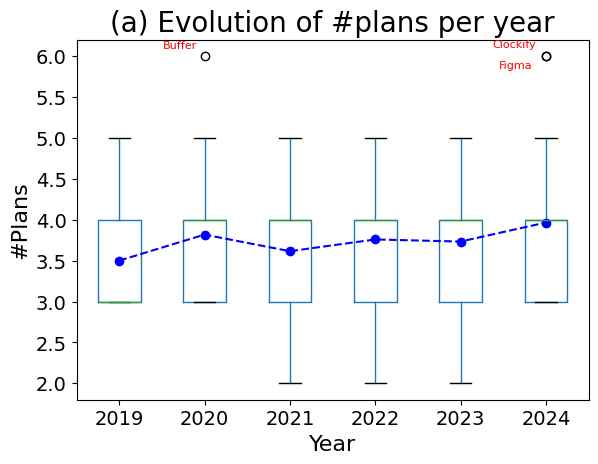

## Mean plans:

|   Year |   Plans |
|-------:|--------:|
|   2019 | 3.5     |
|   2020 | 3.81818 |
|   2021 | 3.61538 |
|   2022 | 3.75862 |
|   2023 | 3.73333 |
|   2024 | 3.96552 |

### Plans Increase:

13.300492610837434%

<Figure size 1200x800 with 0 Axes>

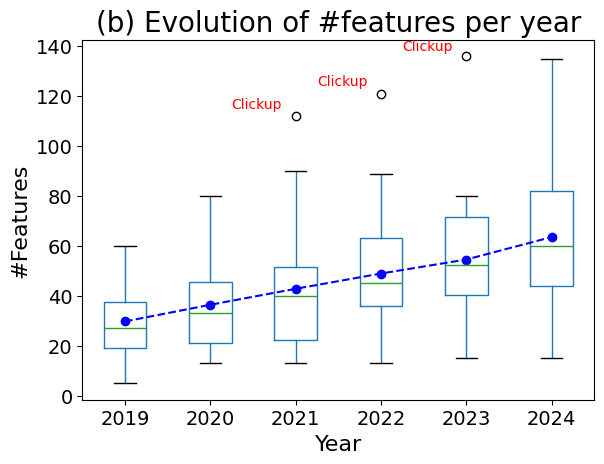

## Mean Features:

|   Year |   Features |
|-------:|-----------:|
|   2019 |    29.7778 |
|   2020 |    36.4545 |
|   2021 |    42.8462 |
|   2022 |    48.9655 |
|   2023 |    54.5667 |
|   2024 |    63.5517 |

### Features Increase:

113.41996911991762%

<Figure size 1200x800 with 0 Axes>

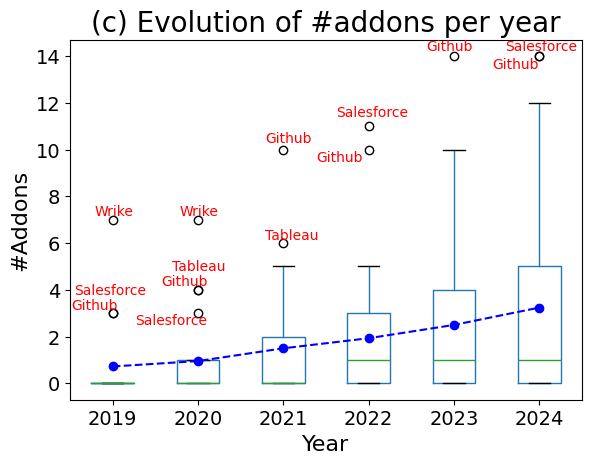

In [29]:
from adjustText import adjust_text

titleSize=20
axisSize=16
fontSize=14
outliersSize=10
plt.rcParams.update({'font.size': fontSize})

# Draw a boxplot of plans per year
plt.figure(figsize=(12, 8))
df.boxplot(column='Plans', by='Year', grid=False)
texts = []
# Añadir nombres de los SaaS a los outliers
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    q1 = year_data['Plans'].quantile(0.25)
    q3 = year_data['Plans'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = year_data[(year_data['Plans'] < lower_bound) | (year_data['Plans'] > upper_bound)]
    
    for idx, row in outliers.iterrows():
        texts.append(plt.gca().text(row['Year']-2018.1, row['Plans'], row['Saas'], horizontalalignment='right', fontsize=8, color='red'))
adjust_text(texts, expand=(1.2, 2)) 

# Calculate means and add line showing its evolution
means = df.groupby('Year')['Plans'].mean()
plt.plot(means.index-2018, means.values, color='blue', marker='o', linestyle='--', label='Median')


plt.title('(a) Evolution of #plans per year', fontsize=titleSize)
plt.suptitle('')
plt.xlabel('Year', fontsize=axisSize)
plt.ylabel('#Plans',fontsize=axisSize)
plt.savefig("./../../figures/SaaS_Plans_Distribution_Evolution.png", format='png', dpi=300)
plt.show()
display(Markdown("## Mean plans:"))
display(Markdown(means.to_markdown()))
display(Markdown("### Plans Increase:"))
display(Markdown(str((means[2024]/means[2019] -1)*100)+"%"))

# Draw a boxplot of features per year
plt.figure(figsize=(12, 8))
df.boxplot(column='Features', by='Year', grid=False)
texts = []
# Añadir nombres de los SaaS a los outliers
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    q1 = year_data['Features'].quantile(0.25)
    q3 = year_data['Features'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = year_data[(year_data['Features'] < lower_bound) | (year_data['Features'] > upper_bound)]
    
    for idx, row in outliers.iterrows():
        texts.append(plt.gca().text(row['Year']-2018.1, row['Features'], row['Saas'], horizontalalignment='right', fontsize=10, color='red'))
adjust_text(texts, expand=(1.2, 2))   

# Calculate means and add line showing its evolution
means = df.groupby('Year')['Features'].mean()
plt.plot(means.index-2018, means.values, color='blue', marker='o', linestyle='--', label='Median')

plt.title('(b) Evolution of #features per year', fontsize=titleSize)
plt.suptitle('')
plt.xlabel('Year', fontsize=axisSize)
plt.ylabel('#Features', fontsize=axisSize)
plt.savefig("./../../figures/SaaS_Features_Distribution_Evolution.png", format='png', dpi=300)
plt.show()

display(Markdown("## Mean Features:"))
display(Markdown(means.to_markdown()))
display(Markdown("### Features Increase:"))
display(Markdown(str((means[2024]/means[2019] -1)*100)+"%"))
# Draw a boxplot of addons per year
plt.figure(figsize=(12, 8))
df.boxplot(column='Addons', by='Year', grid=False)
# Añadir nombres de los SaaS a los outliers
texts = []
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    q1 = year_data['Addons'].quantile(0.25)
    q3 = year_data['Addons'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = year_data[(year_data['Addons'] < lower_bound) | (year_data['Addons'] > upper_bound)]
    
    for idx, row in outliers.iterrows():
        texts.append(plt.gca().text(row['Year']-2018.1, row['Addons'], row['Saas'], horizontalalignment='right', fontsize=outliersSize, color='red'))
adjust_text(texts, expand=(1.2, 1.1))        

# Calculate means and add line showing its evolution
means = df.groupby('Year')['Addons'].mean()

plt.plot(means.index-2018, means.values, color='blue', marker='o', linestyle='--', label='Median')

plt.title('(c) Evolution of #addons per year', fontsize=titleSize)
plt.suptitle('')
plt.xlabel('Year', fontsize=axisSize)
plt.ylabel('#Addons', fontsize=axisSize)
plt.savefig("./../../figures/SaaS_Addons_Distribution_Evolution.png", format='png', dpi=300)
plt.show()

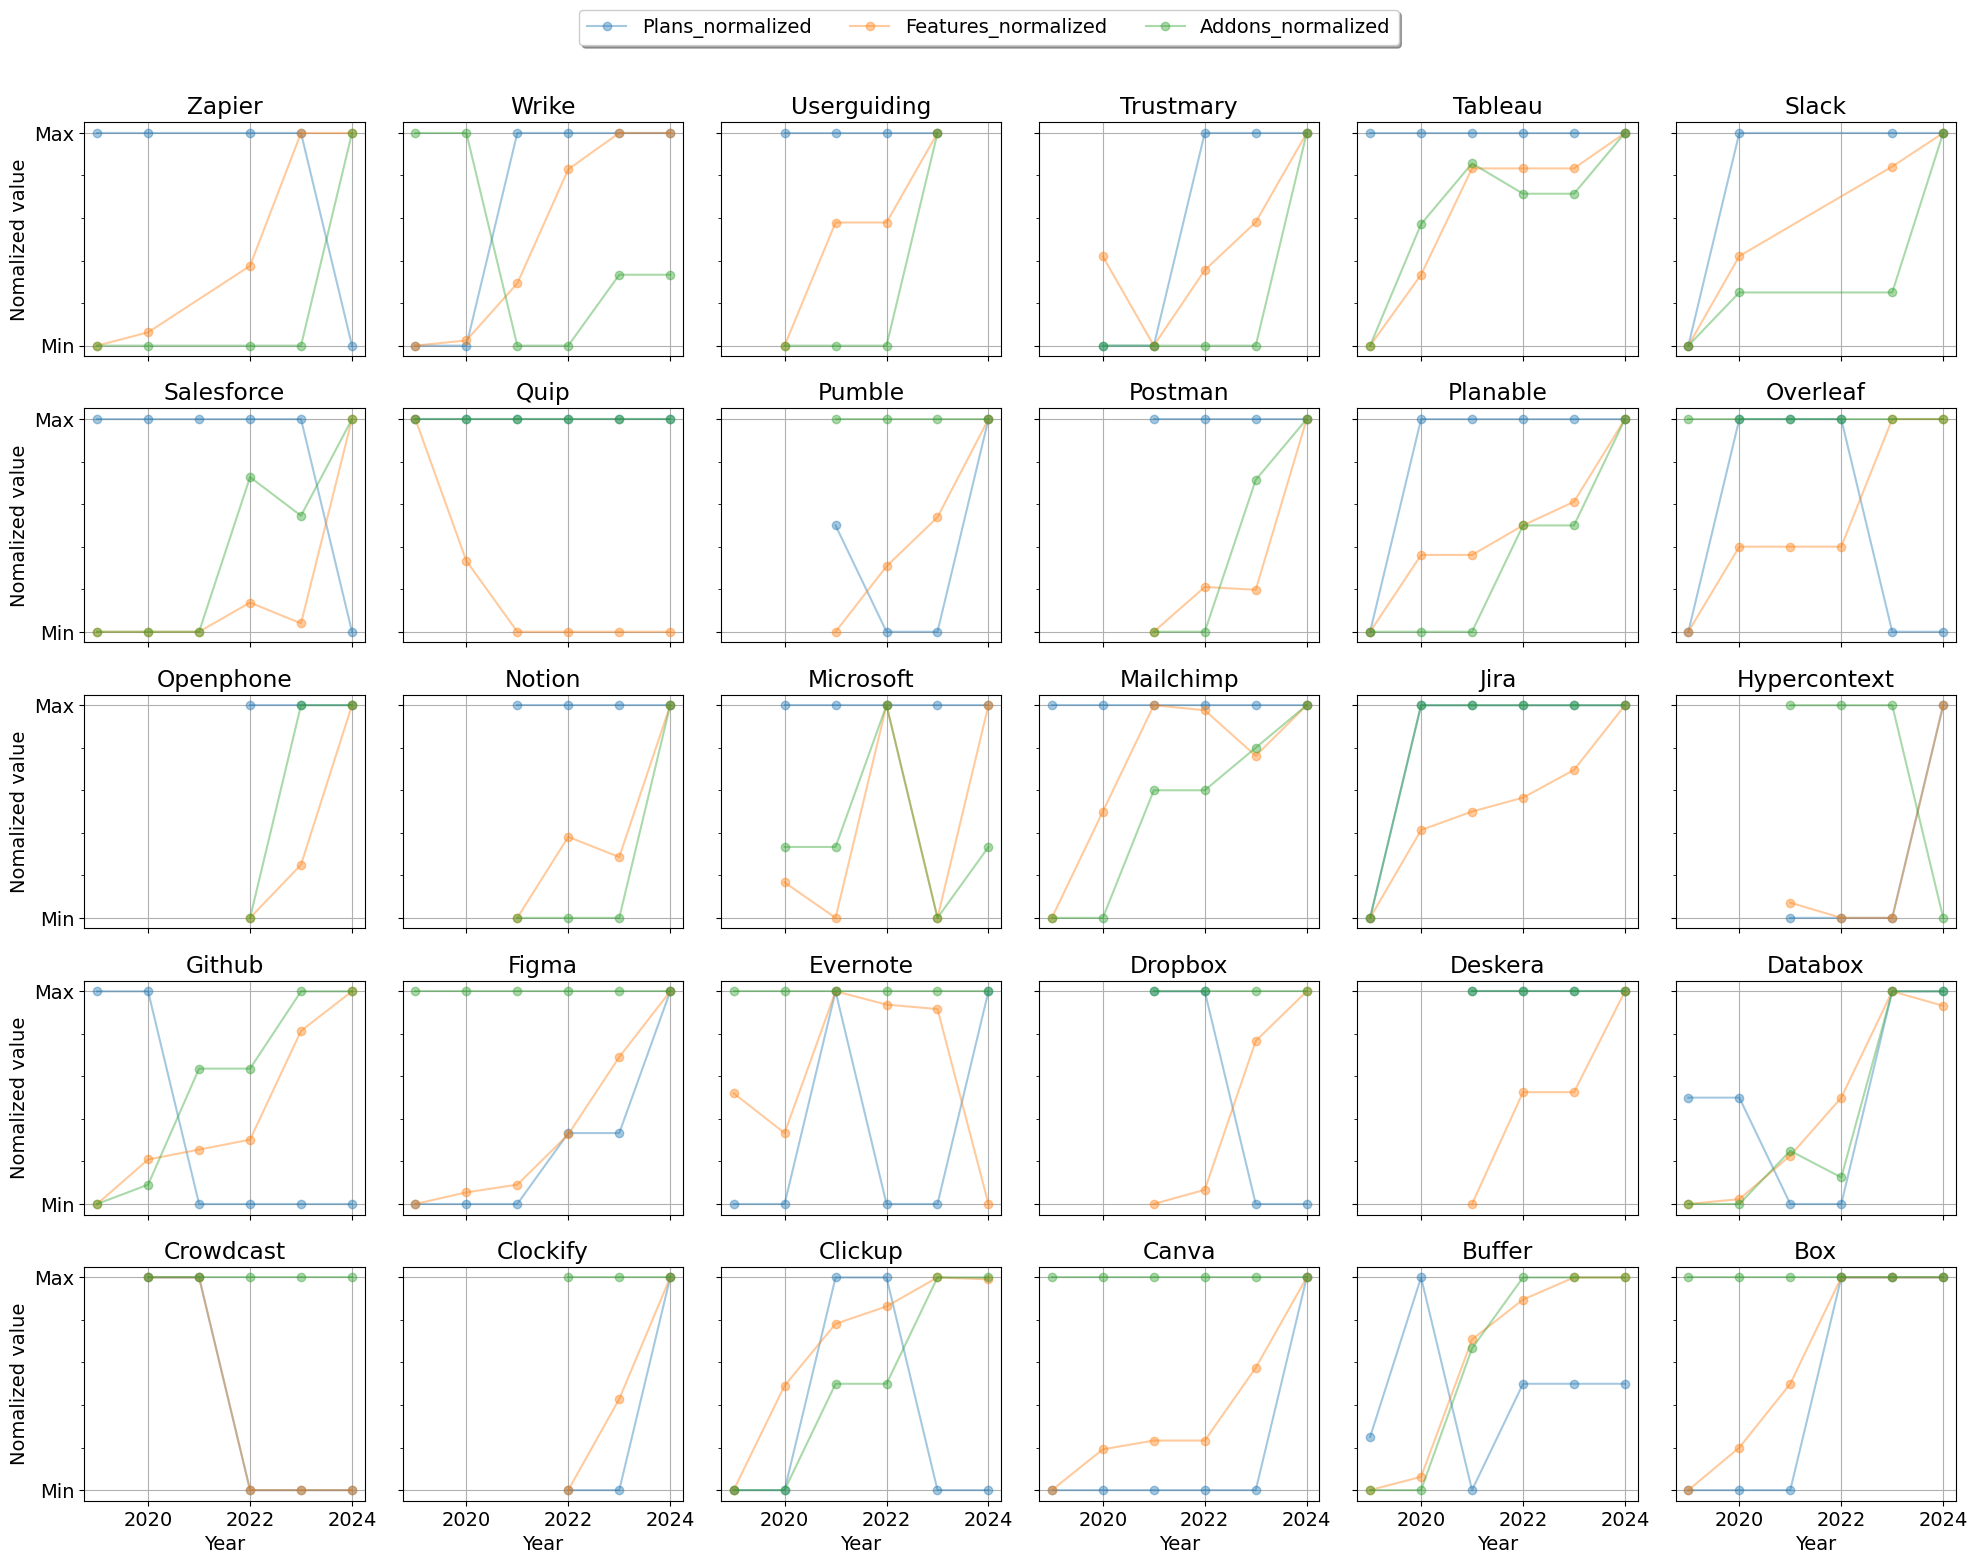

In [8]:
# Setting up the subplots as a 5x6 grid
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting the data
saas_companies = df_normalized['Saas'].unique()
for i, saas in enumerate(saas_companies):
    df_saas = df_normalized[df_normalized['Saas'] == saas]
    ax = axes[i]
    df_saas.plot(x='Year', y=['Plans_normalized', 'Features_normalized', 'Addons_normalized'], ax=ax, marker='o', alpha=0.4)
    ax.set_title(f'{saas}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Nomalized value')
    #ax.legend(['Plans Normalized', 'Features Normalized', 'Addons Normalized'])
    ax.grid(True)
    ax.get_legend().remove()  # Remove legend from subplots

    # Customizing the x-axis labels to show 'min' and 'max'
    min_label = "Min" #f"Min: P({df_saas['Plans_min'].iloc[0]}), F({df_saas['Features_min'].iloc[0]}), A({df_saas['Addons_min'].iloc[0]})"
    max_label = "Max" #f"Max: P({df_saas['Plans_max'].iloc[0]}), F({df_saas['Features_max'].iloc[0]}), A({df_saas['Addons_max'].iloc[0]})"
    ax.set_yticks([0, 1])
    ax.set_yticklabels([min_label, max_label])

# Remove any empty subplots
#for j in range(i+1, len(axes)):
#    fig.delaxes(axes[j])

# Add a single legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)

plt.tight_layout(rect=[0, 0, 1, 0.999])  # Adjust layout to make space for the legend
plt.tight_layout()
plt.show()


---

# ALTERNATIVES TO PREVIOUS VISUALIZATION

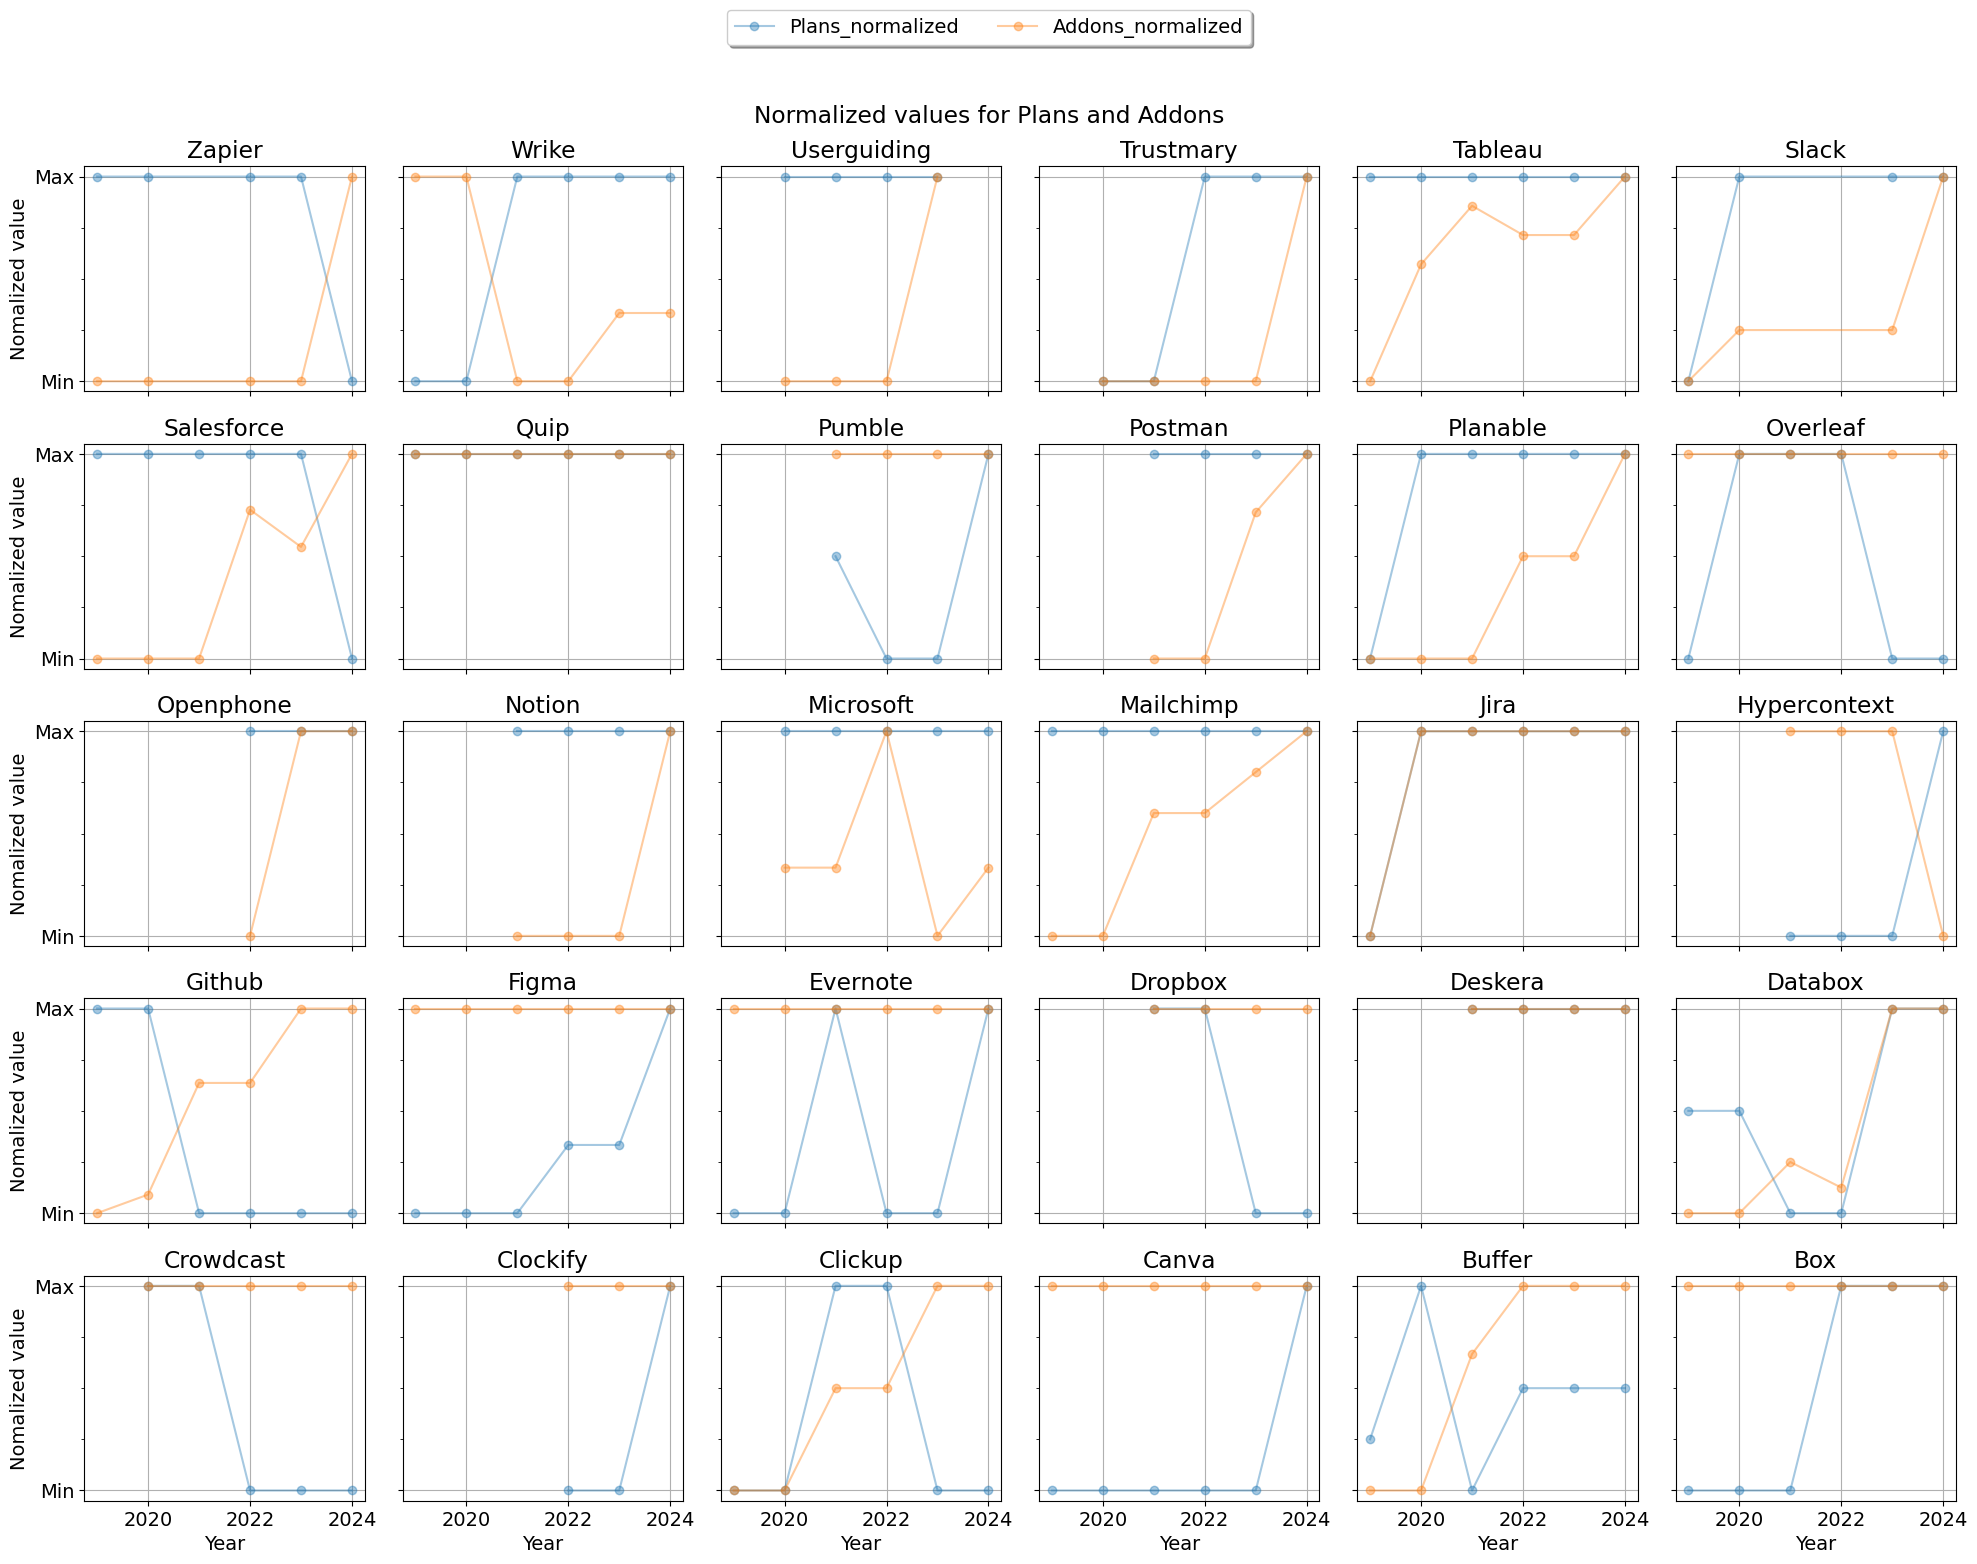

In [9]:
# Setting up the subplots as a 5x6 grid
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting the data
saas_companies = df_normalized['Saas'].unique()
for i, saas in enumerate(saas_companies):
    df_saas = df_normalized[df_normalized['Saas'] == saas]
    ax = axes[i]
    df_saas.plot(x='Year', y=['Plans_normalized', 'Addons_normalized'], ax=ax, marker='o', alpha=0.4)
    ax.set_title(f'{saas}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Nomalized value')
    #ax.legend(['Plans Normalized', 'Features Normalized', 'Addons Normalized'])
    ax.grid(True)
    ax.get_legend().remove()  # Remove legend from subplots

    # Customizing the x-axis labels to show 'min' and 'max'
    min_label = "Min" #f"Min: P({df_saas['Plans_min'].iloc[0]}), F({df_saas['Features_min'].iloc[0]}), A({df_saas['Addons_min'].iloc[0]})"
    max_label = "Max" #f"Max: P({df_saas['Plans_max'].iloc[0]}), F({df_saas['Features_max'].iloc[0]}), A({df_saas['Addons_max'].iloc[0]})"
    ax.set_yticks([0, 1])
    ax.set_yticklabels([min_label, max_label])

# Remove any empty subplots
#for j in range(i+1, len(axes)):
#    fig.delaxes(axes[j])

# Add a single legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
fig.suptitle('Normalized values for Plans and Addons')

plt.tight_layout(rect=[0, 0, 1, 0.999])  # Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

In [10]:
def normalize_features(df):

    col_min = 0
    col_max = df.groupby('Saas')["Features"].transform('max')
    dif = col_max - col_min                
    df['Features_normalized'] = (df["Features"] - col_min) / dif
    df['Features_normalized'] = df['Features_normalized'].where(dif != 0, 1)
    df['Features_min'] = col_min
    df['Features_max'] = col_max

    return df

df_normalized_features = normalize_features(df)

df_normalized_features

,Saas,Year,Plans,Features,Addons,Has_Many_Products,Plans_normalized,Plans_min,Plans_max,Features_normalized,Features_min,Features_max,Addons_normalized,Addons_min,Addons_max
0,Zapier,2019,5,19,0,False,1.0,4,5,0.372549,0,51,0.0,0,4
1,Zapier,2020,5,21,0,False,1.0,4,5,0.411765,0,51,0.0,0,4
2,Zapier,2022,5,31,0,False,1.0,4,5,0.607843,0,51,0.0,0,4
3,Zapier,2023,5,51,0,False,1.0,4,5,1.000000,0,51,0.0,0,4
4,Zapier,2024,4,51,4,False,0.0,4,5,1.000000,0,51,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Box,2020,4,42,0,False,0.0,4,5,0.840000,0,50,1.0,0,0
150,Box,2021,4,45,0,False,0.0,4,5,0.900000,0,50,1.0,0,0
151,Box,2022,5,50,0,False,1.0,4,5,1.000000,0,50,1.0,0,0
152,Box,2023,5,50,0,False,1.0,4,5,1.000000,0,50,1.0,0,0


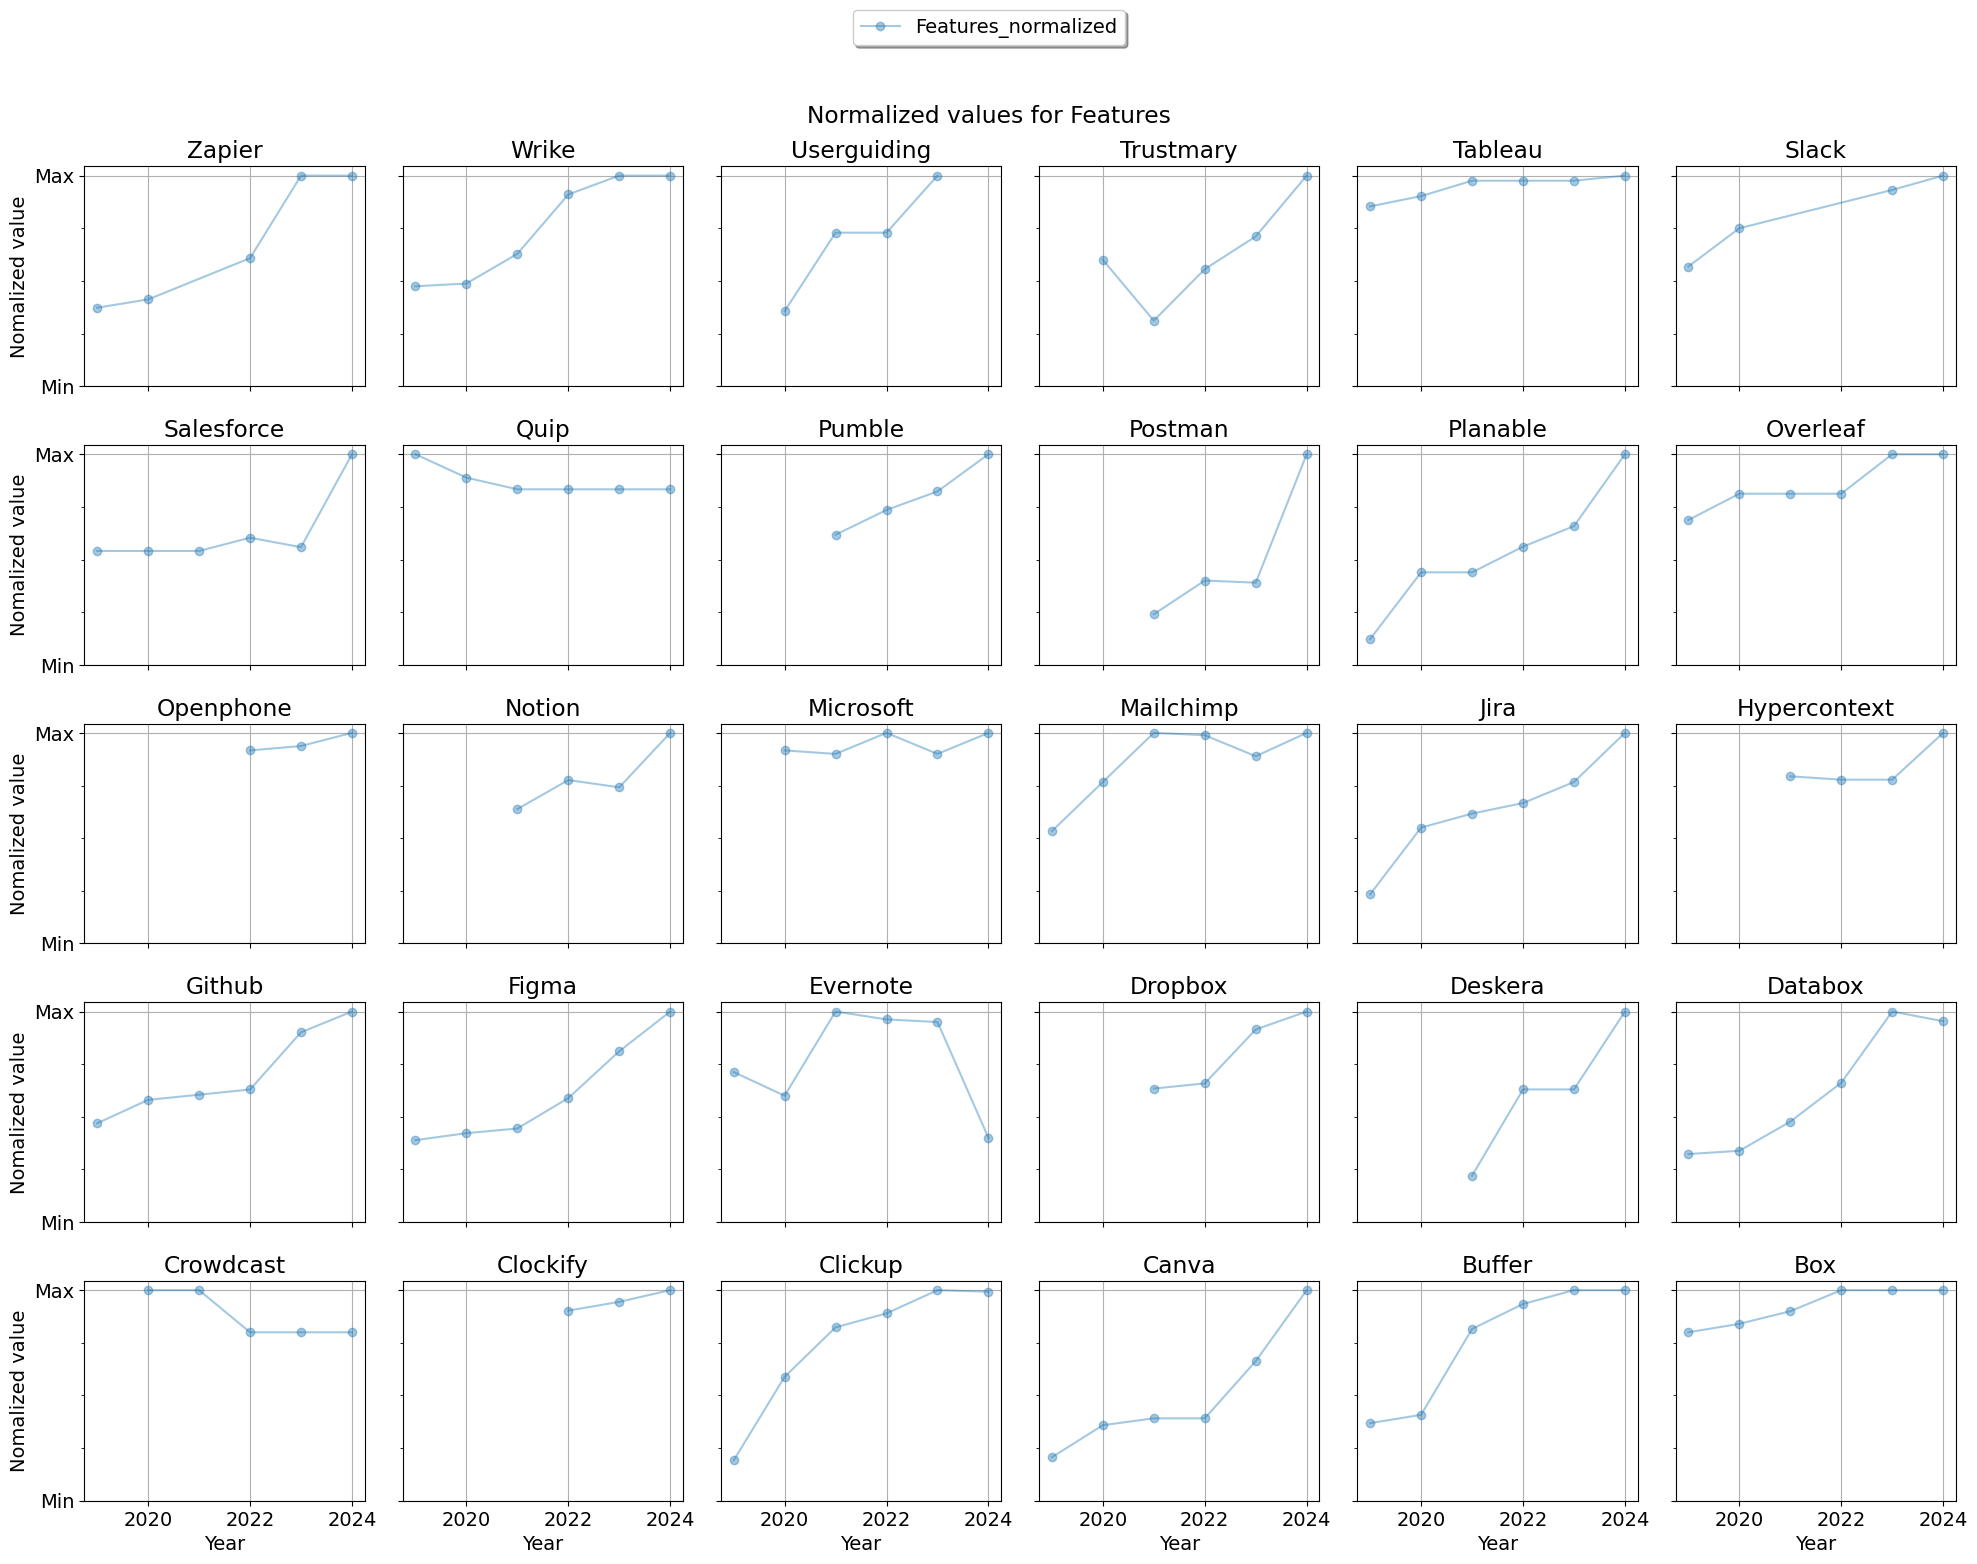

In [11]:
# Setting up the subplots as a 5x6 grid
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting the data
saas_companies = df_normalized_features['Saas'].unique()
for i, saas in enumerate(saas_companies):
    df_saas = df_normalized_features[df_normalized_features['Saas'] == saas]
    ax = axes[i]
    df_saas.plot(x='Year', y='Features_normalized', ax=ax, marker='o', alpha=0.4)
    ax.set_title(f'{saas}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Nomalized value')
    #ax.legend(['Plans Normalized', 'Features Normalized', 'Addons Normalized'])
    ax.grid(True)
    ax.get_legend().remove()  # Remove legend from subplots

    # Customizing the x-axis labels to show 'min' and 'max'
    min_label = "Min" #f"Min: P({df_saas['Plans_min'].iloc[0]}), F({df_saas['Features_min'].iloc[0]}), A({df_saas['Addons_min'].iloc[0]})"
    max_label = "Max" #f"Max: P({df_saas['Plans_max'].iloc[0]}), F({df_saas['Features_max'].iloc[0]}), A({df_saas['Addons_max'].iloc[0]})"
    ax.set_yticks([0, 1])
    ax.set_yticklabels([min_label, max_label])

# Remove any empty subplots
#for j in range(i+1, len(axes)):
#    fig.delaxes(axes[j])

# Add a single legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
fig.suptitle('Normalized values for Features')

plt.tight_layout(rect=[0, 0, 1, 0.999])  # Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

---

### Additional Plots and Metrics regarding configuration Space

In [12]:
def get_feature_data_from_dataset(dataset):
    data = {}
    feature_types = ["INFORMATION", "INTEGRATION", "DOMAIN", "AUTOMATION", "MANAGEMENT", "GUARANTEE", "SUPPORT", "PAYMENT"]

    for i in range(len(dataset)):
        pricing: PricingManager = dataset[i]
        saas_index_name = pricing.saas_name.split(" ")[0].strip().lower().capitalize()
        if pricing.year == int(STUDIED_YEARS[-1]):
            data[saas_index_name] = {}
            for feature_type in feature_types:
                index_name = f"{feature_type.lower()}_features"
                data[saas_index_name][index_name] = len(list(filter(lambda x: x.__class__.__name__.upper() == feature_type, pricing.features.values())))

    data_items = sorted(data.items(), key=lambda x: x[0])
    data = dict(data_items)

    return data

def build_features_dataframe(data):
    # Inicializamos una lista para almacenar los registros
    records = []

    # Iteramos a través del diccionario anidado
    for saas, metrics in data.items():
            if metrics is not None:  # Verificamos si hay métricas disponibles para ese año
                # Creamos un registro con la estructura deseada y lo añadimos a la lista de registros
                record = {
                    'Saas': saas,
                    'Information_Features': metrics.get('information_features'),
                    'Integration_Features': metrics.get('integration_features'),
                    'Domain_Features': metrics.get('domain_features'),
                    'Automation_Features': metrics.get('automation_features'),
                    'Management_Features': metrics.get('management_features'),
                    'Guarantee_Features': metrics.get('guarantee_features'),
                    'Support_Features': metrics.get('support_features'),
                    'Payment_Features': metrics.get('payment_features'),
                }
                records.append(record)

    # Convertimos la lista de registros a un DataFrame de Pandas
    df = pd.DataFrame(records, columns=['Saas', 'Information_Features', 'Integration_Features', 'Domain_Features', 'Automation_Features', 'Management_Features', 'Guarantee_Features', 'Support_Features', 'Payment_Features'])
    return df

# Construcción del DataFrame
data = get_feature_data_from_dataset(dataset)
features_df = build_features_dataframe(data)

# Mostrar el DataFrame
features_df

,Saas,Information_Features,Integration_Features,Domain_Features,Automation_Features,Management_Features,Guarantee_Features,Support_Features,Payment_Features
0,Box,2,9,21,1,9,7,1,0
1,Buffer,22,18,20,9,4,0,3,0
2,Canva,5,7,33,15,18,3,10,1
3,Clickup,1,17,83,9,15,3,7,0
4,Clockify,9,8,40,1,13,1,0,0
5,Crowdcast,2,2,9,0,0,0,2,1
6,Databox,4,12,27,7,6,1,5,0
7,Deskera,8,12,64,10,5,1,0,0
8,Dropbox,4,5,43,3,11,12,3,1
9,Evernote,1,11,10,2,4,1,3,0


In [13]:
def compute_global_feature_distribution(data):
    # Eliminar la columna 'Saas' para centrarnos solo en las features
    df_features = data.drop(columns=['Saas'])

    # Contar el total de cada feature
    feature_totals = df_features.sum()

    # Calcular el porcentaje de cada feature
    feature_percentages = feature_totals / feature_totals.sum() * 100

    # Crear un DataFrame con los resultados
    result_df = pd.DataFrame({
        'Feature_Type': feature_percentages.index,
        'Percentage': feature_percentages.values
    })

    return result_df

# Calcular la distribución de las features
feature_distribution = compute_global_feature_distribution(features_df)

# Mostrar la distribución de las features
display(Markdown("# Global Feature Distribution"))
display(Markdown(feature_distribution.to_markdown()))

# Global Feature Distribution

|    | Feature_Type         |   Percentage |
|---:|:---------------------|-------------:|
|  0 | Information_Features |     6.34835  |
|  1 | Integration_Features |    14.1074   |
|  2 | Domain_Features      |    48.6164   |
|  3 | Automation_Features  |     9.71243  |
|  4 | Management_Features  |    12.4797   |
|  5 | Guarantee_Features   |     3.14704  |
|  6 | Support_Features     |     5.2089   |
|  7 | Payment_Features     |     0.379816 |

In [14]:
def compute_mean_feature_distribution(data):
    # Eliminar la columna 'Saas' para centrarnos solo en las features
    df_features = data.drop(columns=['Saas'])

    df_percentages = df_features.div(df_features.sum(axis=1), axis=0) * 100

    # Añadir la columna 'Saas' de nuevo al DataFrame de porcentajes
    df_percentages['Saas'] = data['Saas']
    
    # Calcular la media porcentual de cada tipo de feature
    mean_percentages = df_percentages.drop(columns=['Saas']).mean()
    
    # Crear un DataFrame con los resultados de las medias porcentuales
    result_df = pd.DataFrame({
        'Feature_Type': mean_percentages.index,
        'Mean_Percentage': mean_percentages.values
    })
    
    return df_percentages, result_df

# Calcular la distribución de las features normalizadas
df_percentages, mean_feature_distribution_df = compute_mean_feature_distribution(features_df)
display(Markdown("# Feature Distribution By SaaS"))
display(Markdown(df_percentages.to_markdown()))
display(Markdown("# Mean Feature Distribution"))
display(Markdown(mean_feature_distribution_df.to_markdown()))

# Feature Distribution By SaaS

|    |   Information_Features |   Integration_Features |   Domain_Features |   Automation_Features |   Management_Features |   Guarantee_Features |   Support_Features |   Payment_Features | Saas         |
|---:|-----------------------:|-----------------------:|------------------:|----------------------:|----------------------:|---------------------:|-------------------:|-------------------:|:-------------|
|  0 |               4        |               18       |           42      |               2       |              18       |             14       |            2       |            0       | Box          |
|  1 |              28.9474   |               23.6842  |           26.3158 |              11.8421  |               5.26316 |              0       |            3.94737 |            0       | Buffer       |
|  2 |               5.43478  |                7.6087  |           35.8696 |              16.3043  |              19.5652  |              3.26087 |           10.8696  |            1.08696 | Canva        |
|  3 |               0.740741 |               12.5926  |           61.4815 |               6.66667 |              11.1111  |              2.22222 |            5.18519 |            0       | Clickup      |
|  4 |              12.5      |               11.1111  |           55.5556 |               1.38889 |              18.0556  |              1.38889 |            0       |            0       | Clockify     |
|  5 |              12.5      |               12.5     |           56.25   |               0       |               0       |              0       |           12.5     |            6.25    | Crowdcast    |
|  6 |               6.45161  |               19.3548  |           43.5484 |              11.2903  |               9.67742 |              1.6129  |            8.06452 |            0       | Databox      |
|  7 |               8        |               12       |           64      |              10       |               5       |              1       |            0       |            0       | Deskera      |
|  8 |               4.87805  |                6.09756 |           52.439  |               3.65854 |              13.4146  |             14.6341  |            3.65854 |            1.21951 | Dropbox      |
|  9 |               3.125    |               34.375   |           31.25   |               6.25    |              12.5     |              3.125   |            9.375   |            0       | Evernote     |
| 10 |               4.44444  |               17.7778  |           47.7778 |               2.22222 |              24.4444  |              0       |            3.33333 |            0       | Figma        |
| 11 |               6.17284  |               17.284   |           16.0494 |              34.5679  |              20.9877  |              0       |            3.7037  |            1.23457 | Github       |
| 12 |              12.6984   |               23.8095  |           41.2698 |               9.52381 |               7.93651 |              0       |            4.7619  |            0       | Hypercontext |
| 13 |              10        |                6.66667 |           53.3333 |               3.33333 |              10       |              8.33333 |            6.66667 |            1.66667 | Jira         |
| 14 |               5.55556  |                7.77778 |           58.8889 |              12.2222  |               5.55556 |              1.11111 |            8.88889 |            0       | Mailchimp    |
| 15 |               1.66667  |                1.66667 |           65      |               6.66667 |              13.3333  |              6.66667 |            5       |            0       | Microsoft    |
| 16 |               6.89655  |               15.5172  |           51.7241 |               3.44828 |              17.2414  |              1.72414 |            3.44828 |            0       | Notion       |
| 17 |               8.33333  |               18.75    |           45.8333 |              14.5833  |               6.25    |              0       |            6.25    |            0       | Openphone    |
| 18 |               6.25     |               31.25    |           56.25   |               0       |               0       |              0       |            6.25    |            0       | Overleaf     |
| 19 |               2.43902  |                2.43902 |           73.1707 |               7.31707 |               0       |              0       |           12.1951  |            2.43902 | Planable     |
| 20 |               5        |               11       |           34      |               8       |              31       |              3       |            7       |            1       | Postman      |
| 21 |               0        |                8.82353 |           58.8235 |               5.88235 |               5.88235 |              8.82353 |           11.7647  |            0       | Pumble       |
| 22 |               6.66667  |               60       |           33.3333 |               0       |               0       |              0       |            0       |            0       | Quip         |
| 23 |               2.7027   |               12.6126  |           64.8649 |              12.6126  |               1.8018  |              0       |            5.40541 |            0       | Salesforce   |
| 24 |               9.09091  |               13.6364  |           25      |              13.6364  |              18.1818  |             18.1818  |            2.27273 |            0       | Slack        |
| 25 |               4.87805  |                7.31707 |           60.9756 |              19.5122  |               7.31707 |              0       |            0       |            0       | Tableau      |
| 26 |               2.22222  |               22.2222  |           51.1111 |               6.66667 |               4.44444 |              2.22222 |           11.1111  |            0       | Trustmary    |
| 27 |               2.5641   |               23.0769  |           46.1538 |              10.2564  |              15.3846  |              2.5641  |            0       |            0       | Wrike        |
| 28 |               3.92157  |                7.84314 |           45.098  |              15.6863  |              17.6471  |              1.96078 |            7.84314 |            0       | Zapier       |

# Mean Feature Distribution

|    | Feature_Type         |   Mean_Percentage |
|---:|:---------------------|------------------:|
|  0 | Information_Features |           6.48554 |
|  1 | Integration_Features |          16.0964  |
|  2 | Domain_Features      |          48.1851  |
|  3 | Automation_Features  |           8.81168 |
|  4 | Management_Features  |          11.0343  |
|  5 | Guarantee_Features   |           3.30454 |
|  6 | Support_Features     |           5.5688  |
|  7 | Payment_Features     |           0.51368 |

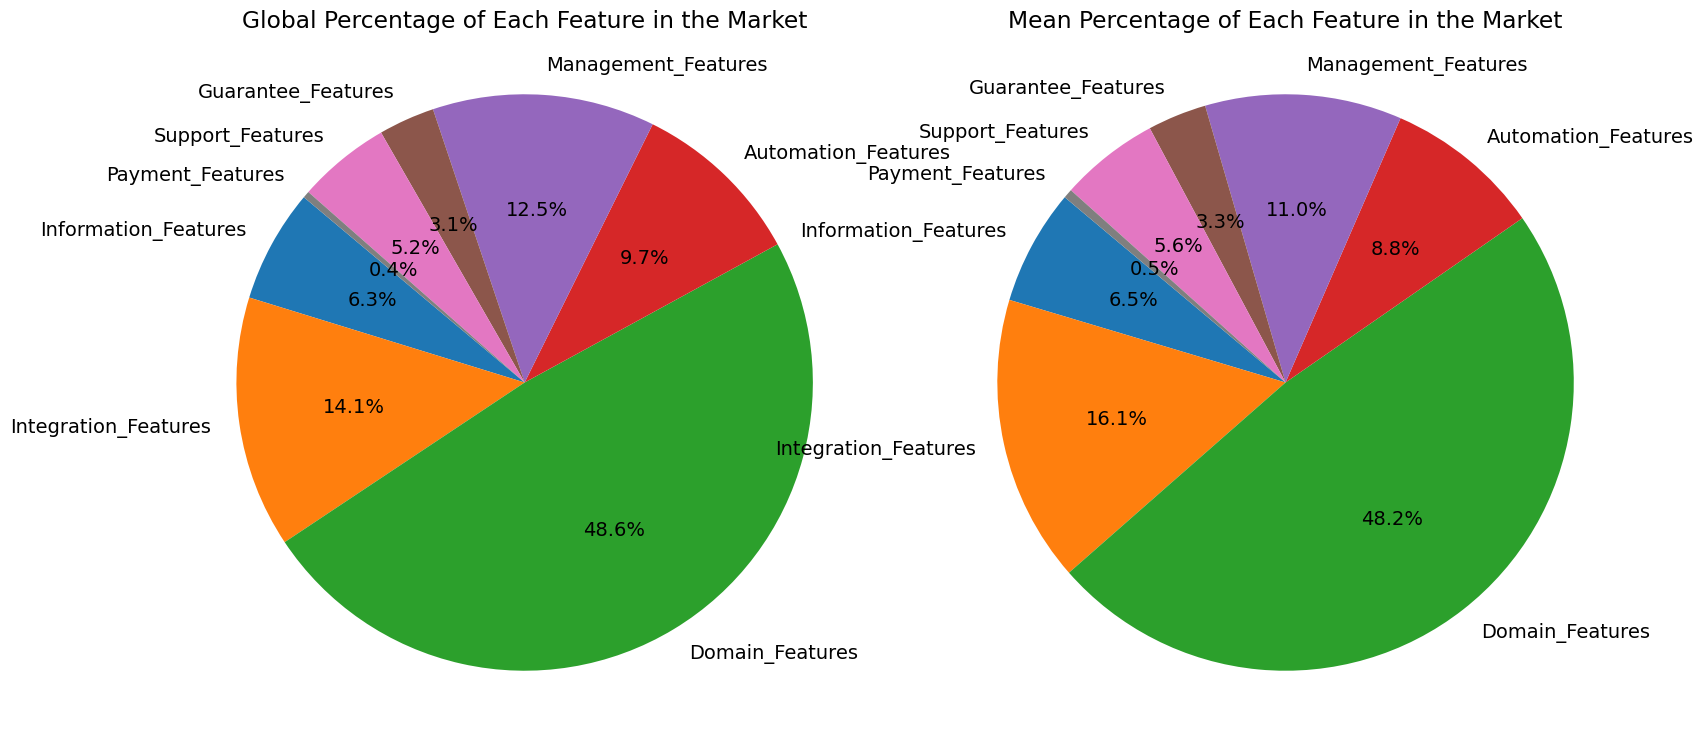

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.pie(feature_distribution['Percentage'], labels=feature_distribution['Feature_Type'], autopct='%1.1f%%', startangle=140)
ax1.set_title('Global Percentage of Each Feature in the Market')
ax1.axis('equal')  # Para asegurar que el gráfico sea un círculo

ax2.pie(mean_feature_distribution_df['Mean_Percentage'], labels=mean_feature_distribution_df['Feature_Type'], autopct='%1.1f%%', startangle=140)
ax2.set_title('Mean Percentage of Each Feature in the Market')
ax2.axis('equal')  # Para asegurar que el gráfico sea un círculo

plt.show()

---

<Figure size 1200x800 with 0 Axes>

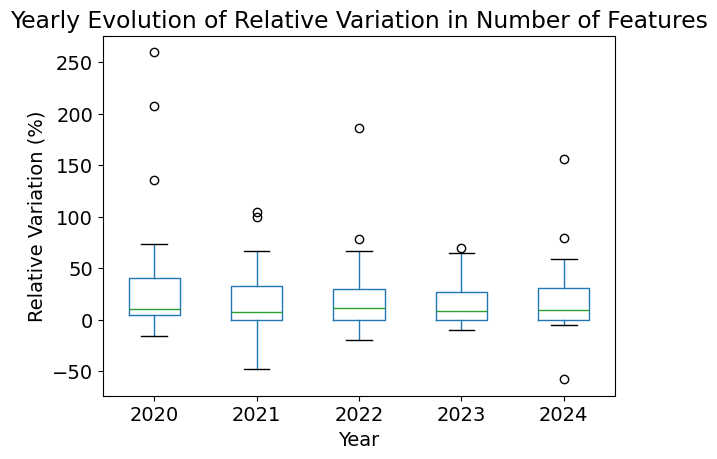

In [16]:
df_feature_percentage = df.copy()
df_feature_percentage['Feature_Percentage_Change'] = df_feature_percentage.groupby('Saas')['Features'].pct_change() * 100

# Filtrar las filas donde la variación es válida (no es NaN)
df_valid = df_feature_percentage.dropna(subset=['Feature_Percentage_Change'])

# Crear un boxplot para las variaciones porcentuales por año
plt.figure(figsize=(12, 8))
df_valid.boxplot(column='Feature_Percentage_Change', by='Year', grid=False)
plt.title('Yearly Evolution of Relative Variation in Number of Features')
plt.suptitle('')  # Para quitar el título adicional generado por pandas
plt.xlabel('Year')
plt.ylabel('Relative Variation (%)')
plt.show()

---

In [17]:
multiple_products_df = df.copy()
multiple_products_df = multiple_products_df[multiple_products_df['Has_Many_Products'] == True]
single_products_df = df.copy()
single_products_df = single_products_df[single_products_df['Has_Many_Products'] == False]

In [18]:
multiple_products_df['Feature_Percentage_Change'] = multiple_products_df.groupby('Saas')['Features'].pct_change() * 100

# Filtrar las filas donde la variación es válida (no es NaN)
multiple_products_df_valid = multiple_products_df.dropna(subset=['Feature_Percentage_Change'])

single_products_df['Feature_Percentage_Change'] = single_products_df.groupby('Saas')['Features'].pct_change() * 100

# Filtrar las filas donde la variación es válida (no es NaN)
single_products_df_valid = single_products_df.dropna(subset=['Feature_Percentage_Change'])

AMOUNT OF SINGLE PRODUCT SAAS: 27
AMOUNT OF MULTIPLE PRODUCT SAAS: 6


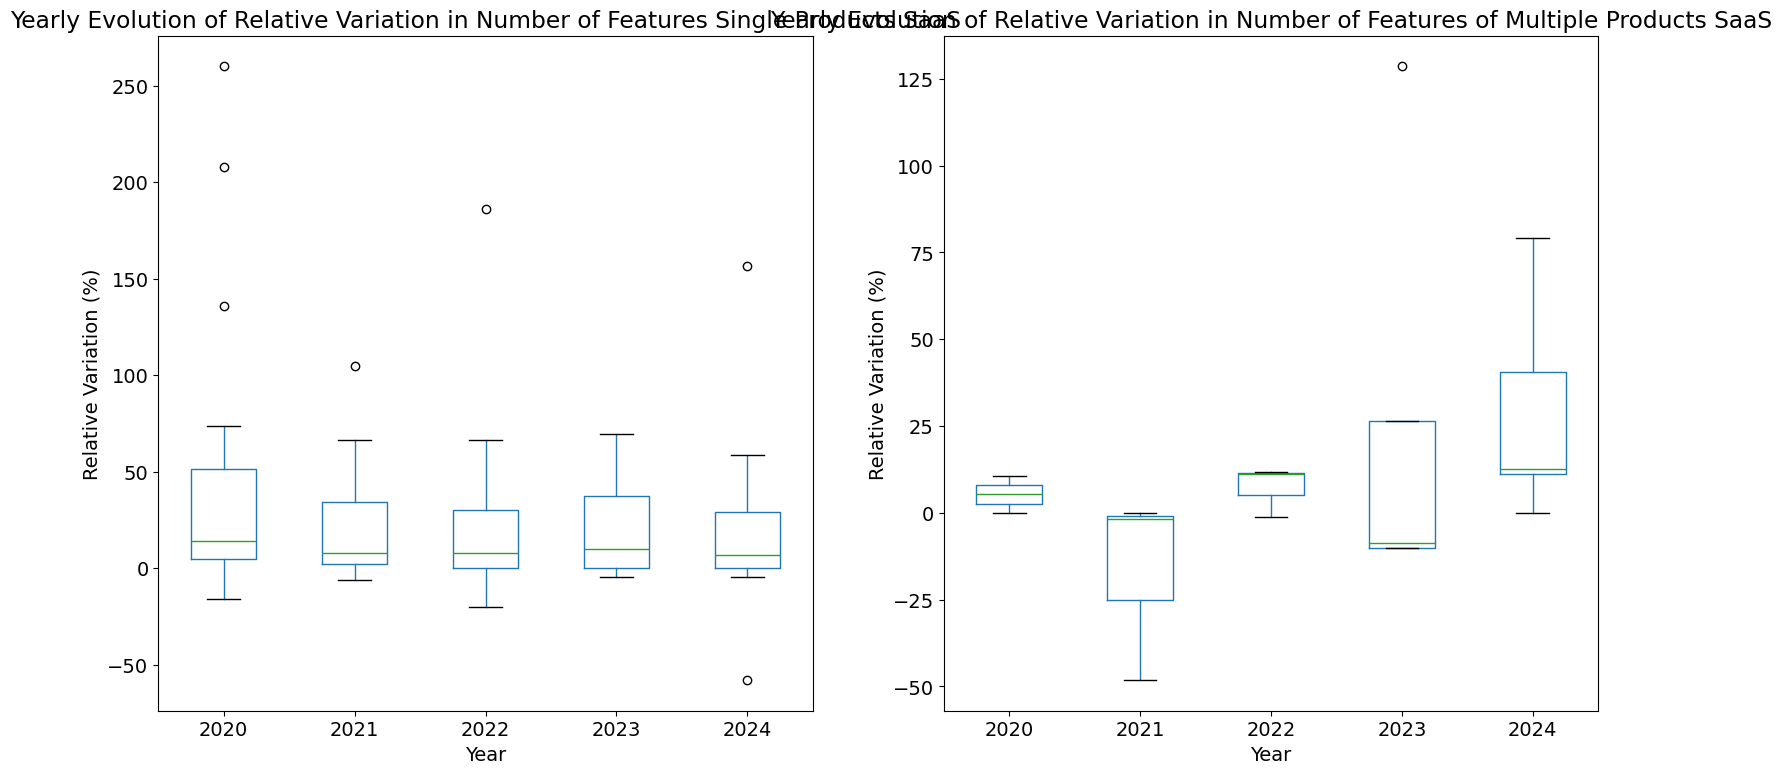

In [19]:
amount_of_single_products = len(single_products_df_valid['Saas'].unique())
amount_of_multiple_products = len(multiple_products_df_valid['Saas'].unique())

print(f"AMOUNT OF SINGLE PRODUCT SAAS: {amount_of_single_products}")
print(f"AMOUNT OF MULTIPLE PRODUCT SAAS: {amount_of_multiple_products}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

single_products_df_valid.boxplot(column='Feature_Percentage_Change', by='Year', grid=False, ax=ax1)
ax1.set_title('Yearly Evolution of Relative Variation in Number of Features Single Products SaaS')
ax1.set_xlabel('Year')
ax1.set_ylabel('Relative Variation (%)')

multiple_products_df_valid.boxplot(column='Feature_Percentage_Change', by='Year', grid=False, ax=ax2)
ax2.set_title('Yearly Evolution of Relative Variation in Number of Features of Multiple Products SaaS')
ax2.set_xlabel('Year')
ax2.set_ylabel('Relative Variation (%)')

fig.suptitle('')  # Para quitar el título adicional generado por pandas

plt.show()

<Figure size 1600x1000 with 0 Axes>

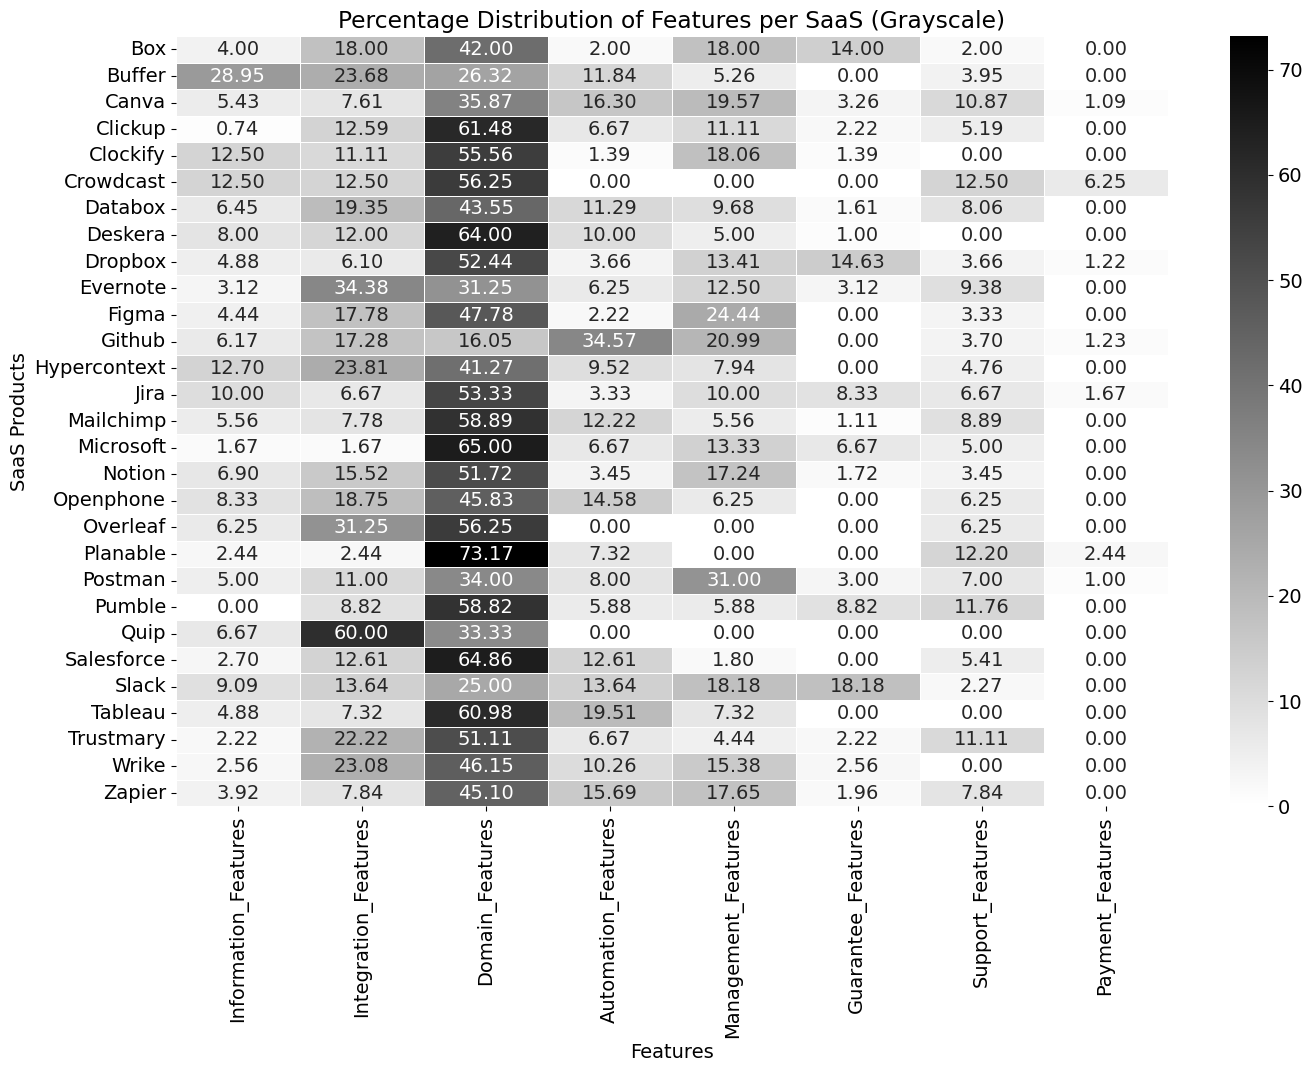

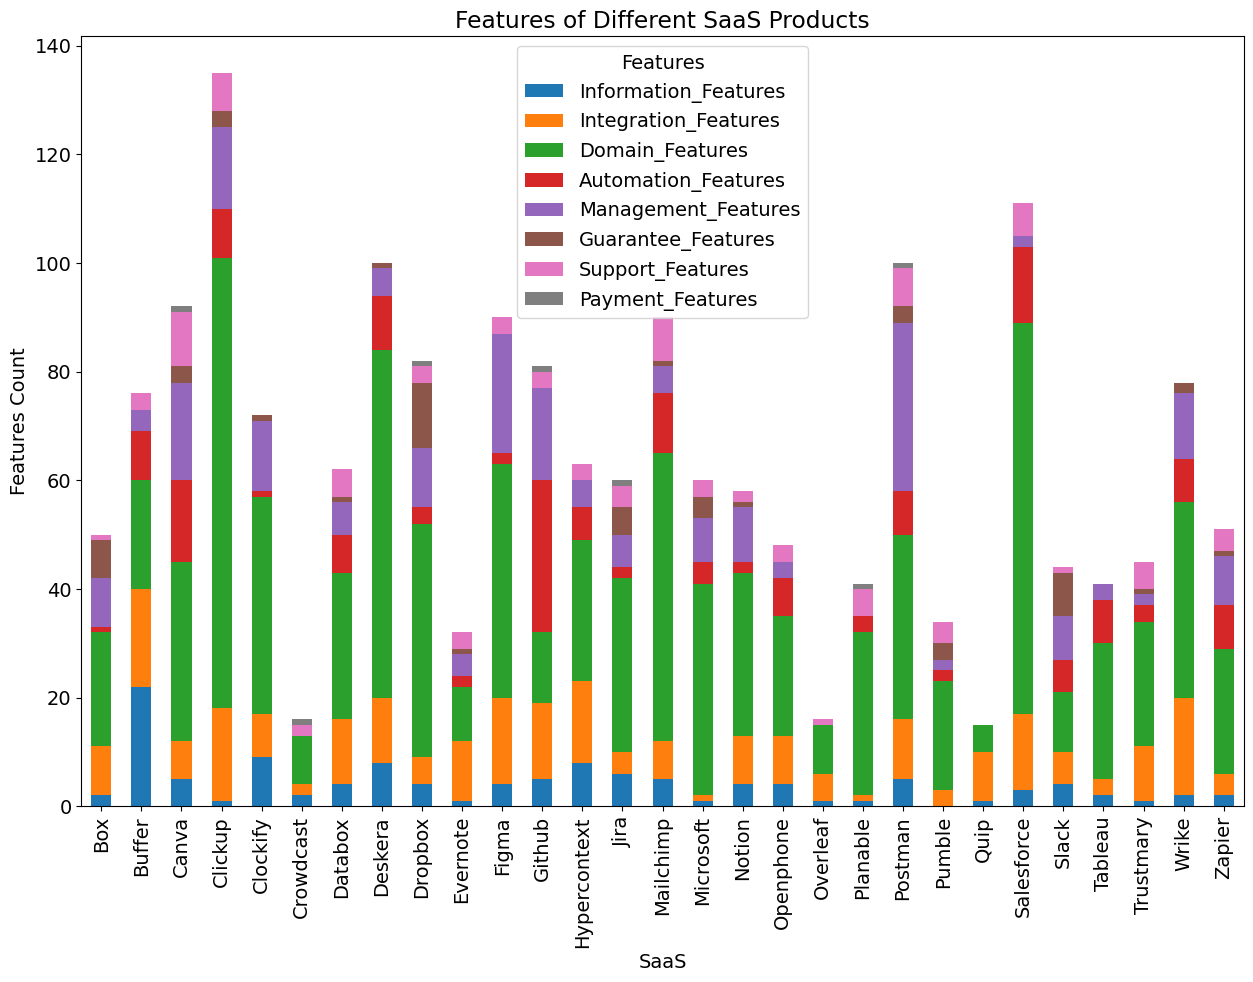

In [20]:
import seaborn as sns
plt.figure(figsize=(16, 10))

# Create the heatmap
df_percent = features_df.set_index('Saas').div(features_df.set_index('Saas').sum(axis=1), axis=0) * 100

# Set the figure size for better readability
plt.figure(figsize=(16, 10))

# Create the heatmap in grayscale
sns.heatmap(df_percent, annot=True, cmap='gray_r', linewidths=.5, fmt=".2f")

# Set the title and labels
plt.title('Percentage Distribution of Features per SaaS (Grayscale)')
plt.xlabel('Features')
plt.ylabel('SaaS Products')

# Display the heatmap
plt.show()


# Bar plot of features
features_df.set_index('Saas').plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Features of Different SaaS Products')
plt.xlabel('SaaS')
plt.ylabel('Features Count')
plt.legend(title='Features')
plt.show()

In [21]:
from math import comb

def calculate_subscriptions(pricing: PricingManager):
    
    np = len(pricing.plans)

    subscriptions = np

    add_ons_by_plan = {}

    for add_on in pricing.add_ons.values():
        for plan in add_on.available_for:
            add_ons_by_plan[plan] = add_ons_by_plan.get(plan, 0) + 1

    for plan, number_of_add_ons in add_ons_by_plan.items():
        for k in range(1, number_of_add_ons+1):
            subscriptions += comb(number_of_add_ons, k)
        
    return subscriptions

def get_subscriptions_data_from_dataset(dataset):
    data = {}

    for i in range(len(dataset)):
        pricing: PricingManager = dataset[i]
        saas_index_name = pricing.saas_name.split(" ")[0].strip().lower().capitalize()
        if saas_index_name.lower() == "office":
            continue
        if saas_index_name not in data:
            data[saas_index_name] = {year: None for year in STUDIED_YEARS}
        
        data[saas_index_name][str(pricing.year)] = {}
        data[saas_index_name][str(pricing.year)]["Subscriptions"] = calculate_subscriptions(pricing)
        data[saas_index_name][str(pricing.year)]["Has_add_ons"] = len(pricing.add_ons) > 0

    data_items = sorted(data.items(), key=lambda x: x[0])
    data = dict(data_items)

    return data

def build_subscriptions_dataframe(data):
    # Inicializamos una lista para almacenar los registros
    records = []

    # Iteramos a través del diccionario anidado
    for saas, years in data.items():
        for year, metrics in years.items():
            if metrics is not None:  # Verificamos si hay métricas disponibles para ese año
                # Creamos un registro con la estructura deseada y lo añadimos a la lista de registros
                record = {
                    'Saas': saas,
                    'Year': int(year),
                    'Subscriptions': metrics["Subscriptions"],
                    'Has_add_ons': metrics["Has_add_ons"]
                }
                records.append(record)

    # Convertimos la lista de registros a un DataFrame de Pandas
    df = pd.DataFrame(records, columns=['Saas', 'Year', 'Subscriptions', "Has_add_ons"])
    return df

subscriptions_data = get_subscriptions_data_from_dataset(dataset)
subscriptions_df = build_subscriptions_dataframe(subscriptions_data)
display(Markdown("# Subscriptions Data"))
display(Markdown(subscriptions_df.to_markdown()))

# Subscriptions Data

|     | Saas         |   Year |   Subscriptions | Has_add_ons   |
|----:|:-------------|-------:|----------------:|:--------------|
|   0 | Box          |   2019 |               4 | False         |
|   1 | Box          |   2020 |               4 | False         |
|   2 | Box          |   2021 |               4 | False         |
|   3 | Box          |   2022 |               5 | False         |
|   4 | Box          |   2023 |               5 | False         |
|   5 | Box          |   2024 |               5 | False         |
|   6 | Buffer       |   2019 |               3 | False         |
|   7 | Buffer       |   2020 |               6 | False         |
|   8 | Buffer       |   2021 |               5 | True          |
|   9 | Buffer       |   2022 |               7 | True          |
|  10 | Buffer       |   2023 |               7 | True          |
|  11 | Buffer       |   2024 |               7 | True          |
|  12 | Canva        |   2019 |               3 | False         |
|  13 | Canva        |   2020 |               3 | False         |
|  14 | Canva        |   2021 |               3 | False         |
|  15 | Canva        |   2022 |               3 | False         |
|  16 | Canva        |   2023 |               3 | False         |
|  17 | Canva        |   2024 |               4 | False         |
|  18 | Clickup      |   2019 |               4 | False         |
|  19 | Clickup      |   2020 |               4 | False         |
|  20 | Clickup      |   2021 |               9 | True          |
|  21 | Clickup      |   2022 |               9 | True          |
|  22 | Clickup      |   2023 |              13 | True          |
|  23 | Clickup      |   2024 |              13 | True          |
|  24 | Clockify     |   2022 |               9 | True          |
|  25 | Clockify     |   2023 |               9 | True          |
|  26 | Clockify     |   2024 |              10 | True          |
|  27 | Crowdcast    |   2020 |               4 | False         |
|  28 | Crowdcast    |   2021 |               4 | False         |
|  29 | Crowdcast    |   2022 |               3 | False         |
|  30 | Crowdcast    |   2023 |               3 | False         |
|  31 | Crowdcast    |   2024 |               3 | False         |
|  32 | Databox      |   2019 |               4 | False         |
|  33 | Databox      |   2020 |               4 | False         |
|  34 | Databox      |   2021 |               9 | True          |
|  35 | Databox      |   2022 |               5 | True          |
|  36 | Databox      |   2023 |             786 | True          |
|  37 | Databox      |   2024 |             786 | True          |
|  38 | Deskera      |   2021 |               3 | False         |
|  39 | Deskera      |   2022 |               3 | False         |
|  40 | Deskera      |   2023 |               3 | False         |
|  41 | Deskera      |   2024 |               3 | False         |
|  42 | Dropbox      |   2021 |               5 | False         |
|  43 | Dropbox      |   2022 |               5 | False         |
|  44 | Dropbox      |   2023 |               4 | False         |
|  45 | Dropbox      |   2024 |               4 | False         |
|  46 | Evernote     |   2019 |               3 | False         |
|  47 | Evernote     |   2020 |               3 | False         |
|  48 | Evernote     |   2021 |               4 | False         |
|  49 | Evernote     |   2022 |               3 | False         |
|  50 | Evernote     |   2023 |               3 | False         |
|  51 | Evernote     |   2024 |               4 | False         |
|  52 | Figma        |   2019 |               3 | False         |
|  53 | Figma        |   2020 |               3 | False         |
|  54 | Figma        |   2021 |               3 | False         |
|  55 | Figma        |   2022 |               4 | False         |
|  56 | Figma        |   2023 |               4 | False         |
|  57 | Figma        |   2024 |               6 | False         |
|  58 | Github       |   2019 |              11 | True          |
|  59 | Github       |   2020 |              14 | True          |
|  60 | Github       |   2021 |            1152 | True          |
|  61 | Github       |   2022 |            1152 | True          |
|  62 | Github       |   2023 |            8960 | True          |
|  63 | Github       |   2024 |            8960 | True          |
|  64 | Hypercontext |   2021 |               4 | True          |
|  65 | Hypercontext |   2022 |               4 | True          |
|  66 | Hypercontext |   2023 |               4 | True          |
|  67 | Hypercontext |   2024 |               4 | False         |
|  68 | Jira         |   2019 |               3 | False         |
|  69 | Jira         |   2020 |               7 | True          |
|  70 | Jira         |   2021 |               7 | True          |
|  71 | Jira         |   2022 |               7 | True          |
|  72 | Jira         |   2023 |               7 | True          |
|  73 | Jira         |   2024 |               7 | True          |
|  74 | Mailchimp    |   2019 |               4 | False         |
|  75 | Mailchimp    |   2020 |               4 | False         |
|  76 | Mailchimp    |   2021 |              26 | True          |
|  77 | Mailchimp    |   2022 |              26 | True          |
|  78 | Mailchimp    |   2023 |              11 | True          |
|  79 | Mailchimp    |   2024 |              15 | True          |
|  80 | Microsoft    |   2020 |               7 | True          |
|  81 | Microsoft    |   2021 |               7 | True          |
|  82 | Microsoft    |   2022 |              13 | True          |
|  83 | Microsoft    |   2023 |               4 | False         |
|  84 | Microsoft    |   2024 |               8 | True          |
|  85 | Notion       |   2021 |               4 | False         |
|  86 | Notion       |   2022 |               4 | False         |
|  87 | Notion       |   2023 |               4 | False         |
|  88 | Notion       |   2024 |               7 | True          |
|  89 | Openphone    |   2022 |              24 | True          |
|  90 | Openphone    |   2023 |             192 | True          |
|  91 | Openphone    |   2024 |             192 | True          |
|  92 | Overleaf     |   2019 |               3 | False         |
|  93 | Overleaf     |   2020 |               4 | False         |
|  94 | Overleaf     |   2021 |               4 | False         |
|  95 | Overleaf     |   2022 |               4 | False         |
|  96 | Overleaf     |   2023 |               3 | False         |
|  97 | Overleaf     |   2024 |               3 | False         |
|  98 | Planable     |   2019 |               3 | False         |
|  99 | Planable     |   2020 |               4 | False         |
| 100 | Planable     |   2021 |               4 | False         |
| 101 | Planable     |   2022 |               6 | True          |
| 102 | Planable     |   2023 |               6 | True          |
| 103 | Planable     |   2024 |              13 | True          |
| 104 | Postman      |   2021 |             112 | True          |
| 105 | Postman      |   2022 |             112 | True          |
| 106 | Postman      |   2023 |            1792 | True          |
| 107 | Postman      |   2024 |            1412 | True          |
| 108 | Pumble       |   2021 |               3 | False         |
| 109 | Pumble       |   2022 |               2 | False         |
| 110 | Pumble       |   2023 |               2 | False         |
| 111 | Pumble       |   2024 |               4 | False         |
| 112 | Quip         |   2019 |               3 | False         |
| 113 | Quip         |   2020 |               3 | False         |
| 114 | Quip         |   2021 |               3 | False         |
| 115 | Quip         |   2022 |               3 | False         |
| 116 | Quip         |   2023 |               3 | False         |
| 117 | Quip         |   2024 |               3 | False         |
| 118 | Salesforce   |   2019 |              10 | True          |
| 119 | Salesforce   |   2020 |              10 | True          |
| 120 | Salesforce   |   2021 |              10 | True          |
| 121 | Salesforce   |   2022 |            1042 | True          |
| 122 | Salesforce   |   2023 |             522 | True          |
| 123 | Salesforce   |   2024 |           12544 | True          |
| 124 | Slack        |   2019 |               3 | False         |
| 125 | Slack        |   2020 |               5 | True          |
| 126 | Slack        |   2023 |               5 | True          |
| 127 | Slack        |   2024 |              21 | True          |
| 128 | Tableau      |   2019 |               3 | False         |
| 129 | Tableau      |   2020 |               8 | True          |
| 130 | Tableau      |   2021 |              24 | True          |
| 131 | Tableau      |   2022 |              16 | True          |
| 132 | Tableau      |   2023 |              16 | True          |
| 133 | Tableau      |   2024 |              48 | True          |
| 134 | Trustmary    |   2020 |               3 | False         |
| 135 | Trustmary    |   2021 |               3 | False         |
| 136 | Trustmary    |   2022 |               4 | False         |
| 137 | Trustmary    |   2023 |               4 | False         |
| 138 | Trustmary    |   2024 |               8 | True          |
| 139 | Userguiding  |   2020 |               3 | False         |
| 140 | Userguiding  |   2021 |               3 | False         |
| 141 | Userguiding  |   2022 |               3 | False         |
| 142 | Userguiding  |   2023 |               4 | True          |
| 143 | Wrike        |   2019 |             194 | True          |
| 144 | Wrike        |   2020 |             194 | True          |
| 145 | Wrike        |   2021 |              42 | True          |
| 146 | Wrike        |   2022 |              42 | True          |
| 147 | Wrike        |   2023 |              85 | True          |
| 148 | Wrike        |   2024 |              85 | True          |
| 149 | Zapier       |   2019 |               5 | False         |
| 150 | Zapier       |   2020 |               5 | False         |
| 151 | Zapier       |   2022 |               5 | False         |
| 152 | Zapier       |   2023 |               5 | False         |
| 153 | Zapier       |   2024 |              40 | True          |

In [22]:
# 1. Calcular el rango intercuartil (IQR)
Q1 = subscriptions_df['Subscriptions'].quantile(0.25)
Q3 = subscriptions_df['Subscriptions'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calcular los límites inferior y superior para identificar los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# 3. Filtrar el DataFrame para eliminar los outliers
subscriptions_df_filtered = subscriptions_df[(subscriptions_df['Subscriptions'] >= lower_limit) & (subscriptions_df['Subscriptions'] <= upper_limit)]

# Mostrar el DataFrame filtrado
subscriptions_df_filtered

,Saas,Year,Subscriptions,Has_add_ons
0,Box,2019,4,False
1,Box,2020,4,False
2,Box,2021,4,False
3,Box,2022,5,False
4,Box,2023,5,False
...,...,...,...,...
142,Userguiding,2023,4,True
149,Zapier,2019,5,False
150,Zapier,2020,5,False
151,Zapier,2022,5,False


<Figure size 1200x800 with 0 Axes>

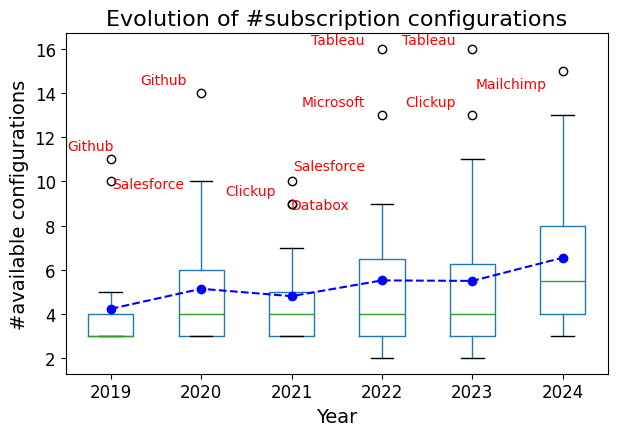

In [23]:
plt.figure(figsize=(12, 8))
subscriptions_df_filtered.boxplot(column='Subscriptions', by='Year', grid=False)
plt.title('Evolution of #subscription configurations', fontdict={'fontsize': 16})
plt.suptitle('')  # Para quitar el título adicional generado por pandas
plt.xlabel('Year', fontdict={'fontsize': 14})
plt.xticks(fontsize=12)
plt.ylabel('#available configurations', fontdict={'fontsize': 14})
plt.yticks(fontsize=12)

# Añadir nombres de los SaaS a los outliers
texts = []
for year in df['Year'].unique():
    year_data = subscriptions_df_filtered[subscriptions_df_filtered['Year'] == year]
    q1 = year_data['Subscriptions'].quantile(0.25)
    q3 = year_data['Subscriptions'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = year_data[(year_data['Subscriptions'] < lower_bound) | (year_data['Subscriptions'] > upper_bound)]
    
    for idx, row in outliers.iterrows():
        texts.append(plt.gca().text(row['Year']-2018.1, row['Subscriptions'], row['Saas'], horizontalalignment='right', fontsize=10, color='red'))
adjust_text(texts, expand=(1.2, 2))    

# Calculate means and add line showing its evolution
means = subscriptions_df_filtered.groupby('Year')['Subscriptions'].mean()
plt.plot(means.index-2018, means.values, color='blue', marker='o', linestyle='--', label='Median')
plt.savefig("./../../figures/SaaS_Available_Subscription_Configurations_Evolution.png", format='png', dpi=800, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

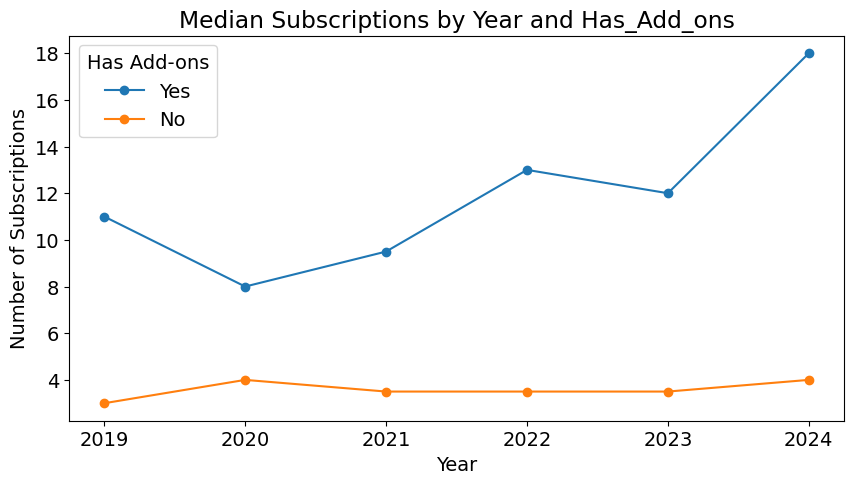

In [24]:
plt.figure(figsize=(10, 5))
subscriptions_df[subscriptions_df['Has_add_ons'] == True].groupby('Year')['Subscriptions'].median().plot(marker='o')
subscriptions_df[subscriptions_df['Has_add_ons'] == False].groupby('Year')['Subscriptions'].median().plot(marker='o')
plt.title('Median Subscriptions by Year and Has_Add_ons')
plt.xlabel('Year')
plt.ylabel('Number of Subscriptions')
plt.legend(title='Has Add-ons', labels=['Yes', 'No'])
plt.show()

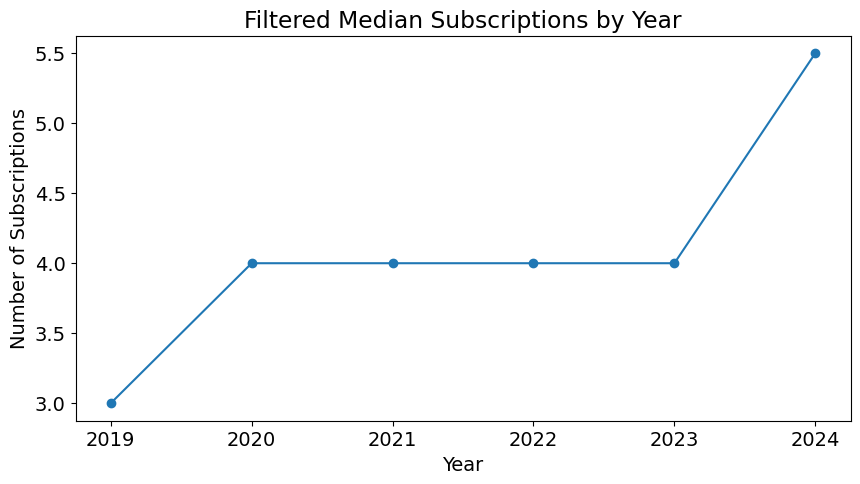

In [25]:
plt.figure(figsize=(10, 5))
subscriptions_df_filtered.groupby('Year')['Subscriptions'].median().plot(marker='o')
plt.title('Filtered Median Subscriptions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Subscriptions')
plt.show()

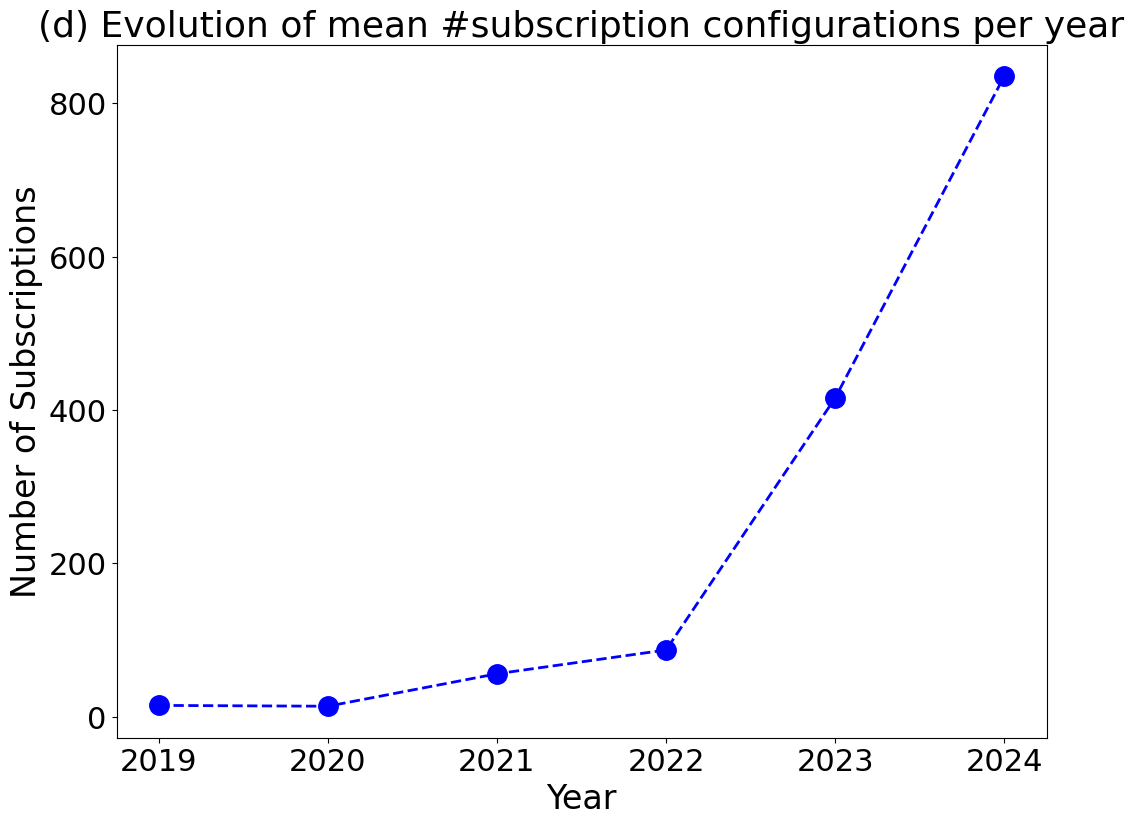

## Mean #subscriptions configurations of SaaS:

|   Year |   Subscriptions |
|-------:|----------------:|
|   2019 |         14.7778 |
|   2020 |         13.7273 |
|   2021 |         56.0385 |
|   2022 |         87.069  |
|   2023 |        415.633  |
|   2024 |        835.138  |

### #Subscriptions configurations Increase:

5551.309307752139%

In [26]:
plt.figure(figsize=(12, 9))
subscriptions_df.groupby('Year')['Subscriptions'].mean().plot(marker='o', linestyle='--', markersize=14, linewidth=2, color='blue')
plt.title('(d) Evolution of mean #subscription configurations per year', fontdict={'fontsize': 26})
plt.xlabel('Year', fontdict={'fontsize': 24})
plt.ylabel('Number of Subscriptions', fontdict={'fontsize': 24})
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig("./../../figures/SaaS_Available_Subscription_Configurations_Evolution_Line.png", format='png', dpi=800, bbox_inches = 'tight')
plt.show()
means =subscriptions_df.groupby('Year')['Subscriptions'].mean()
display(Markdown("## Mean #subscriptions configurations of SaaS:"))
display(Markdown(means.to_markdown()))
display(Markdown("### #Subscriptions configurations Increase:"))
display(Markdown(str((means[2024]/means[2019] -1)*100)+"%"))


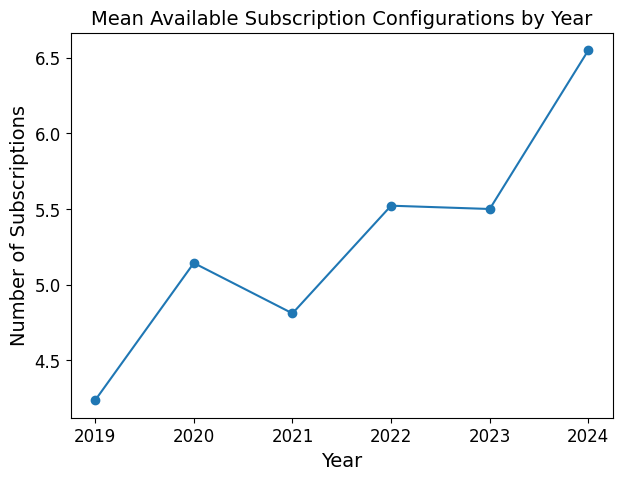

In [27]:
plt.figure(figsize=(7, 5))
subscriptions_df_filtered.groupby('Year')['Subscriptions'].mean().plot(marker='o')
plt.title('Mean Available Subscription Configurations by Year', fontdict={'fontsize': 14})
plt.xlabel('Year', fontdict={'fontsize': 14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of Subscriptions', fontdict={'fontsize': 14})
plt.show()

<Figure size 1200x800 with 0 Axes>

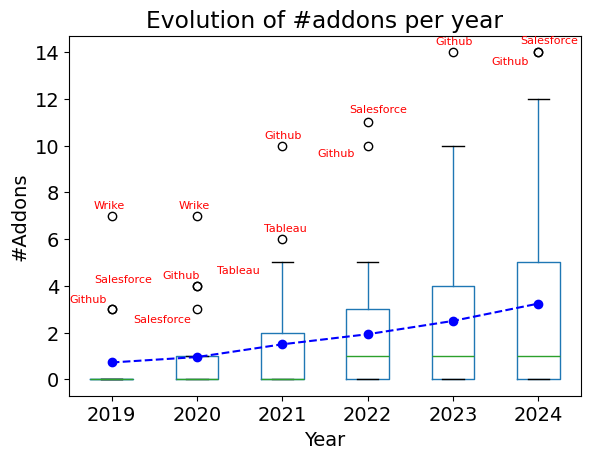

In [30]:
# Draw a boxplot of addons per year
plt.figure(figsize=(12, 8))
df.boxplot(column='Addons', by='Year', grid=False)
# Añadir nombres de los SaaS a los outliers
texts = []
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    q1 = year_data['Addons'].quantile(0.25)
    q3 = year_data['Addons'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = year_data[(year_data['Addons'] < lower_bound) | (year_data['Addons'] > upper_bound)]
    
    for idx, row in outliers.iterrows():
        texts.append(plt.gca().text(row['Year']-2018.1, row['Addons'], row['Saas'], horizontalalignment='right', fontsize=8, color='red'))
adjust_text(texts, expand=(1.2, 2))        

# Calculate means and add line showing its evolution
means = df.groupby('Year')['Addons'].mean()
plt.plot(means.index-2018, means.values, color='blue', marker='o', linestyle='--', label='Median')

plt.title('Evolution of #addons per year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('#Addons')
plt.savefig("./../../figures/SaaS_Addons_Distribution_Evolution.png", format='png', dpi=300)
plt.show()

# Statistical tests

We compare if there are significant differences in the numer of features, plans and addons in the whole set of SaaS among the extreme years of the study (2019 and 2024).



In [32]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Filter data for 2019 and 2024
df_2019 = df[df['Year'] == 2019]
df_2024 = df[df['Year'] == 2024]

# Compare Features
features_2019 = df_2019['Features'].dropna()
features_2024 = df_2024['Features'].dropna()

# Normality Test:
normal_features_2019 = shapiro(features_2019).pvalue > 0.05
normal_features_2024 = shapiro(features_2024).pvalue > 0.05

# Homoscedasticity (Variance homogeneity) test:
equal_var_features = levene(features_2019, features_2024).pvalue > 0.05

# T Student or Mann-Withney U tests:
if normal_features_2019 and normal_features_2024 and equal_var_features:
    features_stat, features_pvalue = ttest_ind(features_2019, features_2024)
else:
    features_stat, features_pvalue = mannwhitneyu(features_2019, features_2024)

# Compare Plans
plans_2019 = df_2019['Plans'].dropna()
plans_2024 = df_2024['Plans'].dropna()

# Normality Test:
normal_plans_2019 = shapiro(plans_2019).pvalue > 0.05
normal_plans_2024 = shapiro(plans_2024).pvalue > 0.05

# Homoscedasticity (Variance homogeneity) test:
equal_var_plans = levene(plans_2019, plans_2024).pvalue > 0.05

# T Student or Mann-Withney U tests:
if normal_plans_2019 and normal_plans_2024 and equal_var_plans:
    plans_stat, plans_pvalue = ttest_ind(plans_2019, plans_2024)
else:
    plans_stat, plans_pvalue = mannwhitneyu(plans_2019, plans_2024)

# Compare addons 
addons_2019 = df_2019['Addons'].dropna()
addons_2024 = df_2024['Addons'].dropna()

# Normality Test:
normal_addons_2019 = shapiro(addons_2019).pvalue > 0.05
normal_addons_2024 = shapiro(addons_2024).pvalue > 0.05

# Homoscedasticity (Variance homogeneity) test:
equal_var_addons = levene(addons_2019, addons_2024).pvalue > 0.05

# T Student or Mann-Withney U tests:
if normal_addons_2019 and normal_addons_2024 and equal_var_addons:
    addons_stat, addons_pvalue = ttest_ind(addons_2019, addons_2024)
else:
    addons_stat, addons_pvalue = mannwhitneyu(addons_2019, addons_2024)

(features_stat, features_pvalue), (plans_stat, plans_pvalue), (addons_stat, addons_pvalue)

((np.float64(81.5), np.float64(8.908145954682172e-05)),
 (np.float64(177.5), np.float64(0.04569486930580376)),
 (np.float64(142.0), np.float64(0.004410823335103186)))

This code compares the features, plans and add-ons between 2019 and 2024 to see if there are statistically significant differences using the appropriate test depending on normality and homogeneity of variances.

**All the tests has shown statistically significant differences** (all p-values are <0.05), and differences between years 2019 and 2024 in addons and features were very strongly significant.

Next we compute effect size estimators. To calculate the effect size of the differences between 2019 and 2024, we can use Cohen's d for the Student's t-test (data following a normal distribution with homogeneous variance) and the r statistic for the Mann-Whitney U test (data that does not follow a normal distribution or with heterogeneous variance).

In [35]:
# Function for computing Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx - 1) * np.var(x) + (ny - 1) * np.var(y)) / dof)

if normal_features_2019 and normal_features_2024 and equal_var_features: 
    features_effect_size = cohen_d(features_2019, features_2024)
    features_estimator = "Cohen' s d:"
else:    
    features_effect_size = features_stat / np.sqrt(len(features_2019) * len(features_2024))
    features_estimator = "r:"

if normal_plans_2019 and normal_plans_2024 and equal_var_plans:    
    plans_effect_size = cohen_d(plans_2019, plans_2024)
    plans_estimator = "Cohen' s d:"
else:    
    plans_effect_size = plans_stat / np.sqrt(len(plans_2019) * len(plans_2024))
    plans_estimator = "r:"

if normal_addons_2019 and normal_addons_2024 and equal_var_addons:
    addons_effect_size = cohen_d(addons_2019, addons_2024)
    addons_estimator = "Cohen' s d :"
else:    
    addons_effect_size = addons_stat / np.sqrt(len(addons_2019) * len(addons_2024))
    addons_estimator = "r:"

('Features',features_estimator,features_effect_size), ('Plans',plans_estimator, plans_effect_size), ('Addons',addons_estimator, addons_effect_size)

(('Features', 'r:', np.float64(3.5671580926891293)),
 ('Plans', 'r:', np.float64(7.768963944200251)),
 ('Addons', 'r:', np.float64(6.215171155360201)))


The effect size values computed in the analysis provide a measure of the magnitude of the differences between the two groups (2019 and 2024) for features, plans, and addons. Here is how to interpret these values:

#### Cohen's d (for t-tests)

Cohen's d is used to measure the effect size for t-tests. The interpretation of Cohen's d values is as follows:

* 0.2: Small effect size
* 0.5: Medium effect size
* 0.8: Large effect size
* A larger Cohen's d indicates a greater difference between the means of the two groups.

#### r (for Mann-Whitney U tests)
The effect size r for the Mann-Whitney U test is interpreted similarly to correlation coefficients:

* 0.1: Small effect size
* 0.3: Medium effect size
* 0.5: Large effect size
* A larger r indicates a greater difference between the distributions of the two groups.

### Practical Interpretation
**Features Effect Size:**

Since the effect size is around 0.3 (r estimator is used), the difference is moderate.


**Plans Effect Size:**

Since the effect size is above 0.5 (r estimator is used), the difference is large.

**Addons Effect Size:**

Since the effect size is above 0.5 (r estimator is used), the difference is large.


These effect sizes help us understand not just whether there is a statistically significant difference, but also the practical significance of the difference. A statistically significant result with a small effect size may indicate that while the difference is real, it is not very impactful in practical terms. Conversely, a large effect size indicates a meaningful difference that could have strong practical implications.